In [3]:
"""
Organizing good plots for syntax, espeically:
- euclidian dist
- state space
"""

'\nOrganizing good plots for syntax, espeically:\n- euclidian dist\n- state space\n'

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load DFallPa dataset

In [ ]:
from neuralmonkey.scripts.analy_dfallpa_extract import extract_dfallpa_helper
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper
from pythonlib.tools.pandastools import append_col_with_grp_index
import seaborn as sns
import os
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_trajectories_single, euclidian_distance_compute_trajectories

animal = "Diego"

version = "stroke"
combine = False

date = 230913
question = "RULE_ANBMCK_STROKE"

# date = 230922
# question = "RULESW_ANY_SEQSUP_STROKE"

# Load a single DFallPA
DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, 
                                    question=question)

dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


In [ ]:
# Load params
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars

LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question, context_version="new")

##### Testing -- compute euclidian distance, using fast method

In [ ]:
# Automaticlaly getting the contrast of interest

list_contrast_idx = params_get_contrasts_of_interest()


In [ ]:
SAVEDIR_ANALYSIS = "/tmp/SYNTAX_EUCL_2"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import euclidian_time_resolved_fast_shuffled
euclidian_time_resolved_fast_shuffled(DFallpa, SAVEDIR_ANALYSIS, question)

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
LIST_TWIND, LIST_TBIN_DUR, LIST_TBIN_SLIDE = _get_list_twind_by_animal("Pancho", event, "traj_to_scalar")
LIST_TWIND[0]

In [ ]:
##### [DEBUG] Run the old (classic) version.

savedir = "/tmp/SYNTAX_TEST"
os.makedirs(savedir, exist_ok=True)
PLOT_STATE_SPACE = False
PLOT_HEATMAPS = False
nmin_trials_per_lev = 4
dim_red_method = "superv_dpca"
superv_dpca_params = {
    "superv_dpca_var":"epch_sytxrol",
    "superv_dpca_vars_group":None,
    "superv_dpca_filtdict":None
}
COMPUTE_EUCLIDIAN = True
PLOT_MASKS = False
PAthisRedu = preprocess_pa(PA, var_effect, vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            savedir, 
            subspace_projection, subspace_projection_fitting_twind,
            twind_analy, tbin_dur, tbin_slide)

dfres = euclidian_distance_compute_trajectories(PAthisRedu, LIST_VAR[16:17], LIST_VARS_OTHERS[16:17], twind_analy, tbin_dur,
                        tbin_slide, savedir, PLOT_TRAJS=PLOT_STATE_SPACE, PLOT_HEATMAPS=PLOT_HEATMAPS,
                        nmin_trials_per_lev=nmin_trials_per_lev,
                        LIST_CONTEXT=LIST_CONTEXT[16:17], LIST_FILTDICT=LIST_FILTDICT[16:17],
                        LIST_PRUNE_MIN_N_LEVS=LIST_PRUNE_MIN_N_LEVS[16:17],
                        NPCS_KEEP=NPCS_KEEP,
                        dim_red_method = dim_red_method, superv_dpca_params=superv_dpca_params,
                        COMPUTE_EUCLIDIAN = COMPUTE_EUCLIDIAN,
                        PLOT_MASKS=PLOT_MASKS)

# Postprocessing
dfres = append_col_with_grp_index(dfres, ["effect_samediff", "context_samediff"], "effect_context")
dfres["effect_context"].value_counts()

In [ ]:
# TODO: chekc if this matches old plot.
# Is NAN treated correcty? I think so, as it only adverses affects the ClAgg, which is not actually used.
# Then run over all variable pairs. 


In [ ]:
### Plotting 
DFDIST = pd.concat(list_dfdist).reset_index(drop=True)


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import postprocess_dfdist_collected
DFDIST = postprocess_dfdist_collected(DFDIST)

In [ ]:
# aggregate, so that each label1 is given 4 datapoints (00, 01, 10, 11)
from pythonlib.tools.pandastools import aggregGeneral, stringify_values


## Load pre-saved data and make plots (eucl dist)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import mult_plot_all_wrapper

mult_plot_all_wrapper()

In [ ]:
# DEBUGGING
import os

animal = "Diego"
save_suffix = "sh_vs_seqsup"
# save_suffix = "AnBmCk_general"
# save_suffix = "two_shape_sets"
dates_skip_failed = [230817, 230913]

# Params
subspace_projection = "epch_sytxrol"
subspace_projection_fitting_twind = (-0.8, 0.3)

# Params for loading dataset
question, dates, map_savesuffix_to_contrast_idx_pairs = get_params_this_save_suffix(animal, save_suffix)

from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question, 
                                                                                                                context_version="new")


##### seqsup -- effect of supervision, controlling for shape
This doesnt work well -- even PMv shows it, due to not controlling for overall motor context

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import postprocess_dfdist_collected
DFDIST, DFDIST_AGG = postprocess_dfdist_collected(DFDIST)


In [ ]:
map_savesuffix_to_contrast_idx_pairs = {
    "test":[
        (11, 5)
    ]
}

In [ ]:
from  neuralmonkey.scripts.analy_syntax_good_eucl_state import mult_plot_all

### Summary plots
SAVEDIR = "/tmp/SYNTAX"
mult_plot_all(DFDIST_AGG, map_savesuffix_to_contrast_idx_pairs, SAVEDIR, question, skip_contrast_idx_pair_if_fail=True)

##### within chunk (did not finish)
Too difficult, as the var others have differnet names... Need to recompute, writing code dedicated to this

In [ ]:
contrast_idx = 15
date = 230920
dfdist = DFDIST[(DFDIST["date"] == date) & (DFDIST["contrast_idx"] == contrast_idx)].reset_index(drop=True)


In [ ]:
dfdist["vars_others"].unique()

In [ ]:
dfdist

In [ ]:
set([x for x in dfdist["_vars_others_1"] if x[-1]=="0"])

In [ ]:
set([x for x in dfdist["_vars_others_1"] if x[-1]=="1"])

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dfdist, ["labels_1", "labels_2"])    


### Debugging -- computing euclidian distance for a single PA

In [ ]:
# var_effect = "chunk_within_rank_semantic"
# vars_others = ["chunk_rank"]
# # vars_context_same = ["gridloc"]
# # vars_context_diff = ["stroke_index"]
# # context_dict = {"same":vars_context_same, "diff":vars_context_diff}
# context_dict = {"same":[], "diff":["gridloc"]}

# var_effect = "gridloc"
# vars_others = ["chunk_rank"]
# # vars_context_same = ["gridloc"]
# # vars_context_diff = ["stroke_index"]
# # context_dict = {"same":vars_context_same, "diff":vars_context_diff}
# context_dict = {"same":[], "diff":["chunk_within_rank_semantic"]}
# ### Testing, on simple thing

var_effect = "shape"
vars_others = ["gridloc"]
# vars_context_same = ["gridloc"]
# vars_context_diff = ["stroke_index"]
# context_dict = {"same":vars_context_same, "diff":vars_context_diff}
context_dict = {"same":[], "diff":["stroke_index"]}

In [ ]:
# Consolidate vars_others into a single variable
from pythonlib.tools.pandastools import append_col_with_grp_index
dflab = PA.Xlabels["trials"]
dflab = append_col_with_grp_index(dflab, vars_others, "_vars_others")
PA.Xlabels["trials"] = dflab

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dflab, [var_effect] + vars_others + ["gridloc"])

In [ ]:
# Newer (fast) method
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar

# (1) Data
savedir = "/tmp/SYNTAX"
os.makedirs(savedir, exist_ok=True)
dfdist, Cldist = timevarying_compute_fast_to_scalar(PA, [var_effect, "_vars_others"], plot_conjunctions_savedir=savedir,
                                                    context_dict = context_dict)


In [ ]:
dfdist

In [ ]:
dfdist

In [ ]:
# Check that the output doesnt include context vriable

In [ ]:
dfres, CldistAgg = Cldist.rsa_distmat_score_all_pairs_of_label_groups(get_only_one_direction=False, return_as_clustclass=True)

In [ ]:
CldistAgg.rsa_plot_heatmap(sort_order=(2,0,1))

In [ ]:
CldistAgg.rsa_labels_extract_label_vars()

In [ ]:
##### Testing out context helper.

# Plot masks
path_for_save_print_lab_each_mask = f"/tmp/SYNTAX/mask.txt"
diffctxt_vars_same = ["shape", "stroke_index"]
diffctxt_vars_diff = []
# diffctxt_vars_diff = ["_vars_others", "stroke_index"]
diff_context_ver = None

PLOT = True
path_for_save_print_lab_each_mask = f"/tmp/SYNTAX/mask.txt"
ma_context, fig, axes = CldistAgg.rsa_mask_context_helper_simple(diffctxt_vars_same, diffctxt_vars_diff, 
                                                            diff_context_ver, only_upper_triangle=False,
                                                            PLOT=PLOT, 
                                                            path_for_save_print_lab_each_mask=path_for_save_print_lab_each_mask)
from pythonlib.tools.plottools import savefig
savefig(fig, f"/tmp/SYNTAX/masks.pdf")
plt.close("all")


In [ ]:
# DONE -- masking at level of trial, 
# PROBLEM -- some cases dont have within-group distance, and so fails above.
# SOLUTION -- have exception to always have within-group scores collected.
# DONE!!

# TODO -- recompute the euclidian distance scores.


# Devo -- shape vs. seqsup, starting from scratch, good controlling of context, etc

In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[14]
dflab = PA.Xlabels["trials"]

In [ ]:
# only keep pool of chars that are in both (no superv, and superv) epochs
dflab = dflab[dflab["epochset_shape"] == ("llCV3",)].reset_index(drop=True)

# assert that each character has each syntax role existing in both epoch
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper
dfout, dict_dfthis = extract_with_levels_of_conjunction_vars_helper(dflab, "superv_is_seq_sup", ["character", "syntax_role"], lenient_allow_data_if_has_n_levels=2, 
                                               levels_var=[False, True])
assert len(dflab) == len(dfout), "This means either (i) a char was not in both epochs or (ii) a char has diff syntax role across epochs"


In [ ]:
# To see what exists
from pythonlib.tools.pandastools import grouping_print_n_samples

# grouping_print_n_samples(dflab, ["epochset_shape", "epoch_rand", "superv_is_seq_sup", "chunk_rank", "shape", "chunk_within_rank"])
grouping_print_n_samples(dflab, ["epochset_shape", "character", "epoch_rand", "superv_is_seq_sup", "chunk_rank", "shape", "chunk_within_rank"])


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_pa
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar


prune_min_n_trials = 4
subspace_projection = "epch_sytxrol"
subspace_projection_fitting_twind = (-0.8, 0.3)
twind_analy = (-1, 0.6)
tbin_dur = 0.15 # Matching params in other analyses
tbin_slide = 0.02

# Compute eucl distance within each shape
var_effect = "chunk_within_rank_semantic_v2"
vars_others = ["epochset_shape", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"]
context_dict = {"same":["epochset_shape", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"], "diff":None}
prune_min_n_levs = 2
# filtdict = {"stroke_index": list(range(1, 10, 1))}
filtdict = {"epochset_shape":[("llCV3",)]}

vars_group = [var_effect, "_vars_others"]

SAVEDIR = "/tmp/SYNTAX_RAW"
os.makedirs(SAVEDIR, exist_ok=True)
print("SAVING AT ... ", SAVEDIR)

# Make sure there is no "diff" in context
if context_dict is not None:
    assert (context_dict["diff"] is None) or (len(context_dict["diff"])==0), "need to run the step above, removing diffs, or else will fail to get diff var_others eucliian"

print("These params: ", var_effect, vars_others, context_dict, filtdict)

# Preprocess
savedir = f"{SAVEDIR}/preprocess"
os.makedirs(savedir, exist_ok=True)

PAthisRedu = preprocess_pa(PA, var_effect, vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            savedir, 
            subspace_projection, subspace_projection_fitting_twind,
            twind_analy, tbin_dur, tbin_slide, use_strings_for_vars_others=False)

###################################### Running euclidian
twind_scal = (-0.1, 0.3)

# Prune to scalar window
pathis = PAthisRedu.slice_by_dim_values_wrapper("times", twind_scal)

# 
rsa_savedir = f"{SAVEDIR}/rsa-twind_scal={twind_scal}"
os.makedirs(rsa_savedir, exist_ok=True)

# Run
dfdist, _ = timevarying_compute_fast_to_scalar(pathis, label_vars=vars_group, rsa_heatmap_savedir=rsa_savedir,
                                                prune_levs_min_n_trials=prune_min_n_trials, 
                                                context_dict=context_dict)


In [ ]:
##### Good, running all
from neuralmonkey.scripts.analy_syntax_good_eucl_state import euclidian_time_resolved_fast_shuffled
question = "RULESW_ANY_SEQSUP_STROKE"
SAVEDIR_ANALYSIS = f"/tmp/SYNTAX_TEST-{question}"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)
euclidian_time_resolved_fast_shuffled(DFallpa, animal, SAVEDIR_ANALYSIS, question, version_seqsup_good=True)

### [Load mult data] and plot

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import mult_plot_all_wrapper
DFDIST = mult_plot_all_wrapper(just_return_data=True)

In [ ]:
DFDIST["date"].value_counts()

In [ ]:
DFDIST = DFDIST[DFDIST["date"]!=250324].reset_index(drop=True)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import mult_plot_grammar_vs_seqsup_new
contrast_version = "shape_index"
mult_plot_grammar_vs_seqsup_new(DFDIST, SAVEDIR, contrast_version)

# Single trial state space

In [ ]:
import pickle
path = "/lemur2/lucas/neural_preprocess/PA_trialpop/Diego-230615/PA.pkl"
with open(path, "rb") as f:
    PA = pickle.load(f)

In [ ]:
PA.Times

# Targeted PCA (good)

In [ ]:
# shape vs. chunk_rank_within_shape

In [ ]:
DFallpa

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
_list_twind, _, _ = _get_list_twind_by_animal(animal, "00_stroke", "traj_to_scalar")
twind_scal = _list_twind[0]

In [ ]:
# variables = ['chunk_within_rank_semantic_v2', 'epoch', 'chunk_rank', 'shape', 
#              'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
#              'CTXT_shape_prev']

# variables = ['epoch', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
#              'CTXT_shape_prev', 'chunk_within_rank', 'chunk_rank']
# variables_is_cat = [True, True, True, True, True, True, False, False]

variables = ['epoch', 'shape', 'gridloc', 'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
             'CTXT_shape_prev', 'chunk_within_rank']
variables_is_cat = [True, True, True, True, True, True, True, False]

assert len(variables)==len(variables_is_cat)

In [ ]:
PA = DFallpa["pa"].values[3]
twind_scal = (0, 1)
PA = PA.slice_by_dim_values_wrapper("times", twind_scal).agg_wrapper("times")
PA.dataextract_subspace_targeted_pca(variables, variables_is_cat, list_subspaces, demean=True, 
                                          normalization=None, plot_orthonormalization=False, 
                                          PLOT_COEFF_HEATMAP=False, savedir_coeff_heatmap=None, PRINT=False)

In [ ]:
PA = DFallpa["pa"].values[0]

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single

dict_subspace_pa, _, _, _, _ = state_space_targeted_pca_scalar_single(
                        PA, twind_scal, variables, variables_is_cat, list_subspaces, 
                        LIST_VAR_VAROTHERS_SS, LIST_DIMS, "/tmp", just_extract_paredu=False,
                        subspace_filtdict = subspace_filtdict)


In [ ]:
# During samp
from pythonlib.tools.vectools import average_vectors_wrapper, get_vector_from_angle
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single, targeted_pca_euclidian_dist_angles

# list_subspaces = [
#     ("chunk_within_rank", "chunk_rank"),
# ]

list_subspaces = [
    ("shape", "chunk_within_rank"),
]

LIST_VAR_VAROTHERS_SS = [
    ("chunk_within_rank", ['epoch', 'chunk_rank', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("chunk_within_rank", ['epoch', 'chunk_rank', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'shape']),
    ("chunk_within_rank", ['epoch']),
    ("shape", ['epoch', 'chunk_within_rank', 'chunk_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("shape", ['epoch', 'chunk_within_rank', 'chunk_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("shape", ['epoch', 'chunk_within_rank', 'chunk_rank']),
    ("shape", ['epoch']),
]

LIST_DIMS = [(0,1), (1,2)]

LIST_VAR_VAROTHERS_REGR = [
    ("chunk_within_rank", ['epoch', 'shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
]

subspace_tuple = ("shape", "chunk_within_rank")

min_levs_per_levother = 2
prune_levs_min_n_trials = 4

SAVEDIR_ANALYSIS = f"/tmp/TERGET_PCA_EUCL_STATE/{animal}-{date}"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)
DFANGLE = targeted_pca_euclidian_dist_angles(DFallpa, SAVEDIR_ANALYSIS, 
                                             variables, variables_is_cat, list_subspaces, LIST_VAR_VAROTHERS_SS, # For dim reduction and plotting state space
                                            subspace_tuple, LIST_VAR_VAROTHERS_REGR)


In [ ]:
### (2) Make all plots
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import targeted_pca_euclidian_dist_angles_plots

for var_vector_length in ["dist_yue_diff", "dist_norm"]:
    for length_method in ["sum", "dot"]:
        for min_levs_exist in [3, 2]:
            savedir = f"{SAVEDIR_ANALYSIS}/PLOTS/varlength={var_vector_length}-lengthmeth={length_method}-minlevs={min_levs_exist}"
            os.makedirs(savedir, exist_ok=True)
            targeted_pca_euclidian_dist_angles_plots(DFANGLE, var_vector_length, length_method, min_levs_exist, savedir)


### [Devo] New method to get different subspaces each using subbset of data

i.e., get separate axes for chunk_within_shape for each shape

In [ ]:
variables = ['epoch', 'chunk_shape', 'gridloc', 'loc_on_clust', 'CTXT_locoffclust_prev', 'loc_off_clust', 
            'CTXT_shape_prev', 'chunk_within_rank']
variables_is_cat = [True, True, True, True, True, True, True, False]

twind_scal_force = [-0.1, 0.3]

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import targeted_pca_state_space_split_over

LIST_DIMS = [(0,1), (1,2)]
SAVEDIR_ANALYSIS = "/tmp/TARGETED_PCA_EUCL_STATE_2"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

LIST_VAR_VAROTHERS = [
    ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_within_rank", ['epoch', 'chunk_shape']),
    ("chunk_within_rank", ['epoch']),
    ("chunk_shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    ("chunk_shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    ("chunk_shape", ['epoch', 'chunk_within_rank']),
    ("chunk_shape", ['epoch']),
]

targeted_pca_state_space_split_over(DFallpa, SAVEDIR_ANALYSIS, 
                                    variables, variables_is_cat, LIST_VAR_VAROTHERS, # For dim reduction and plotting state space
                                       twind_scal_force)

# [RSA] making version that controls for other parameters

In [ ]:
DFallpa
PA = DFallpa["pa"].values[2]

In [ ]:
DFallpa

In [ ]:
LIST_VAR

In [ ]:
SAVEDIR = f"/tmp/RSAGOOD"

In [ ]:
twind_analy = (-1, 0.6)
tbin_dur = 0.15 # Matching params in other analyses
tbin_slide = 0.02
N_MIN_TRIALS = 4
prune_min_n_trials = N_MIN_TRIALS

list_fit_twind = [(-0.8, 0.3)]

from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
_list_twind, _, _ = _get_list_twind_by_animal(animal, "00_stroke", "traj_to_scalar")
assert len(_list_twind)==1, "why mutliple?"
twind_ideal = _list_twind[0]

# twind_scal = (-0.5, -0.05) # char_sp
# list_twind_scal = [(-0.1, 0.3)] # syntax, previously
if False:
    list_twind_scal = [twind_ideal, (-0.3, -0.1)]
else:
    list_twind_scal = [twind_ideal]

# ### Load params

LIST_VAR = [
    "chunk_within_rank_semantic_v2", 
    # "chunk_within_rank", 
    "chunk_within_rank_fromlast", 
    "syntax_role", # ------------- Using syntax_role instead of stroke_index
    "stroke_index",
    "syntax_role", # ------------- Using syntax_role instead of stroke_index
    ]
LIST_VARS_OTHERS = [
    ["epoch", "chunk_rank", "shape"], 
    # ["epoch", "chunk_rank", "shape"], 
    ["epoch", "chunk_rank", "shape"], 
    ["epoch", "chunk_rank", "shape"], # ------------- Using syntax_role instead of stroke_index
    ["epoch", "FEAT_num_strokes_beh"],
    ["epoch"], # ------------- Using syntax_role instead of stroke_index
    ]
LIST_CONTEXT = [
    None,
    # None,
    None,
    None,
    None,
    None,
    ]

LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
# filtdict = {"stroke_index": list(range(1, 10, 1))}
# filtdict = {"epochset_shape":[("llCV3",)]}
LIST_FILTDICT = [None for _ in range(len(LIST_VAR))]
use_strings_for_vars_others = False
# list_subspace_projection = ["sytx_all", "epch_sytxrol", "syntax_role"]
list_subspace_projection = ["sytx_all"]
is_seqsup_version = False

### Automaticlaly getting the contrast of interest
# The inidices are not documneted. Therefore get all of them.
list_contrast_idx = list(range(len(LIST_VAR)))

# Map from index to variables and other params.
contrasts_dict = {}
for idx in sorted(list_contrast_idx):
    contrasts_dict[idx] = [LIST_VAR[idx], LIST_VARS_OTHERS[idx], LIST_CONTEXT[idx], LIST_PRUNE_MIN_N_LEVS[idx], LIST_FILTDICT[idx]]

# - for method
from pythonlib.cluster.clustclass import Clusters
cl = Clusters(None)

# # Save some general params
# from pythonlib.tools.expttools import writeDictToTxtFlattened
# writeDictToTxtFlattened({
#     "list_subspace_projection":list_subspace_projection,
#     "twind_analy":twind_analy,
#     "tbin_dur":tbin_dur,
#     "tbin_slide":tbin_slide,
#     "prune_min_n_trials":prune_min_n_trials,
#     "list_fit_twind":list_fit_twind,
#     "list_twind_scal":list_twind_scal,
#     "LIST_VAR":LIST_VAR,
#     "LIST_VARS_OTHERS":LIST_VARS_OTHERS,
#     "LIST_CONTEXT":LIST_CONTEXT,
#     "LIST_PRUNE_MIN_N_LEVS":LIST_PRUNE_MIN_N_LEVS,
#     "LIST_FILTDICT":LIST_FILTDICT,
#     "list_contrast_idx":list_contrast_idx}, path=f"{SAVEDIR_ANALYSIS}/params.txt")

# from pythonlib.tools.expttools import writeDictToTxtFlattened
# writeDictToTxtFlattened(contrasts_dict, path=f"{SAVEDIR_ANALYSIS}/contrasts_dict.txt", 
#                         header = "contrast_idx: var, vars_others, context, prune_min_n_levs, filtdict")

### RUN
subspace_projection = "sytx_all"
subspace_projection_fitting_twind = (-0.8, 0.3)


# Get variables for this contrast  
var_effect = "chunk_within_rank_semantic"
vars_others =  ["epoch", "shape"]
context_dict = None
prune_min_n_levs = 4
filtdict = {}
vars_group = [var_effect, "_vars_others"]

# SAVEDIR = f"{SAVEDIR_ANALYSIS}/{which_level}-{bregion}-{event}-ss={subspace_projection}-fit_twind={subspace_projection_fitting_twind}/contrast={contrast_idx}|{var_effect}"
# os.makedirs(SAVEDIR, exist_ok=True)
# print("SAVING AT ... ", SAVEDIR)

# Make sure there is no "diff" in context
if context_dict is not None:
    assert (context_dict["diff"] is None) or (len(context_dict["diff"])==0), "need to run the step above, removing diffs, or else will fail to get diff var_others eucliian"

print("These params: ", var_effect, vars_others, context_dict, filtdict)

# Preprocess
savedir = f"{SAVEDIR}/preprocess"
os.makedirs(savedir, exist_ok=True)

from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_pa
PAthisRedu = preprocess_pa(PA, var_effect, vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            savedir, 
            subspace_projection, subspace_projection_fitting_twind,
            twind_analy, tbin_dur, tbin_slide, use_strings_for_vars_others=use_strings_for_vars_others,
            is_seqsup_version=is_seqsup_version)


###################################### Running euclidian
context_dict = {
    # "same":["shape", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_loconclust_next"],
    "same":["shape", "gridloc", "CTXT_loc_prev"],
    # "same":["shape", "gridloc", "CTXT_gridloc_prev", "CTXT_shape_prev", "CTXT_gridloc_next"],
    # "same":["shape", "gridloc", "CTXT_gridloc_prev", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_gridloc_next", "CTXT_loconclust_next"],
    "diff":[],
    }
# context_dict = None
for twind_scal in list_twind_scal:

    # Prune to scalar window
    pathis = PAthisRedu.slice_by_dim_values_wrapper("times", twind_scal)

    # 
    rsa_savedir = f"{SAVEDIR}/rsa-twind_scal={twind_scal}"
    os.makedirs(rsa_savedir, exist_ok=True)

    # Run
    from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar
    dfdist, Cldist = timevarying_compute_fast_to_scalar(pathis, label_vars=vars_group, rsa_heatmap_savedir=rsa_savedir,
                                                    context_dict=context_dict)


In [ ]:
Cldist.Xinput<0

In [ ]:
# Plot RSA
label_vars = [var_effect, "_vars_others"]
context_dict = None
# context_dict = {
#     # "same":["shape", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_loconclust_next"],
#     # "same":["loc_on_clust"],
#     # "same":["CTXT_loc_prev", "gridloc"],
#     "same":["gridloc"],
#     "diff":[],
#     }
_, CldistAgg = Cldist.rsa_distmat_score_all_pairs_of_label_groups(label_vars=label_vars, get_only_one_direction=False, 
                                                                return_as_clustclass=True,
                                                                context_dict=context_dict,
                                                                return_as_clustclass_which_var_score="dist_yue_diff")

sort_order = (1,0)
fig, ax = CldistAgg.rsa_plot_heatmap(sort_order, zlims=None)


In [ ]:
# Plot RSA
label_vars = [var_effect, "_vars_others"]
context_dict = None
context_dict = {
    # "same":["shape", "loc_on_clust", "CTXT_locoffclust_prev", "loc_off_clust", "CTXT_shape_prev", "CTXT_loconclust_next"],
    # "same":["loc_on_clust"],
    # "same":["CTXT_loc_prev", "gridloc"],
    "same":["gridloc"],
    "diff":[],
    }
_, CldistAgg = Cldist.rsa_distmat_score_all_pairs_of_label_groups(label_vars=label_vars, get_only_one_direction=False, 
                                                                return_as_clustclass=True,
                                                                context_dict=context_dict,
                                                                return_as_clustclass_which_var_score="dist_mean")

sort_order = (1,0)
fig, ax = CldistAgg.rsa_plot_heatmap(sort_order, zlims=None)


# [Good] Targeted dim reduction, done carefully [250731]

In [ ]:
# # Notes, prior code.

# # For getting multi-axis subspace
# PA.dataextract ...
# (as done in char_sp...)

# # For getting subspace separately for each othervar
# PA.regress_neuron_task_variables_all_chans_data_splits
# (as done in syntax state .py)

In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concatbregion_preprocess_wrapper, dfpa_concat_bregion_to_combined_bregion


In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concatbregion_preprocess_wrapper, dfpa_concat_bregion_to_combined_bregion
from pythonlib.tools.exceptions import NotEnoughDataException
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/syntax_good"


# animal = "Diego"
# date = 250321

animal = "Pancho"
date = 230826

version = "stroke"
combine = False

from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concat_bregion_to_combined_bregion

### (1) load Grammar Dfallpa
question = "RULE_ANBMCK_STROKE"
DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, 
                                    question=question)
DFallpa = dfpa_concat_bregion_to_combined_bregion(DFallpa)

try:
    ### (2) Load SP data
    question = "SP_BASE_stroke"
    twind = [-0.5, 2.1]
    DFallpaSP = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, 
                                        question=question, twind=twind)
    DFallpaSP = dfpa_concat_bregion_to_combined_bregion(DFallpaSP)

    # Merge SP and grammar along chan indices
    from neuralmonkey.classes.population_mult import dfpa_concat_merge_pa_along_trials
    DFallpa = dfpa_concat_merge_pa_along_trials(DFallpa, DFallpaSP)
    del DFallpaSP
except NotEnoughDataException as err:
    # pass
    # Then this is because chans dont line up. Not good.
    raise err
except Exception as err:
    pass

# Make a copy of all PA before normalization
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


In [ ]:
DFallpa

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import targeted_pca_clean_plots_and_dfdist
import os
SAVEDIR_ALL = "/tmp/SYNTAX_TARGETED_PCA_run4" 
os.makedirs(SAVEDIR_ALL, exist_ok=True)
targeted_pca_clean_plots_and_dfdist(DFallpa, animal, date, SAVEDIR_ALL, DEBUG=True)

##### Debugging, using single PA

In [ ]:
PA = DFallpa["pa"].values[0]
dflab = PA.Xlabels["trials"]

In [ ]:
dflab = PA.Xlabels["trials"]

In [ ]:
dflab["epoch"].value_counts()

In [ ]:
dflab["task_kind"]

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dflab, ["task_kind", "shape", "gridloc"])

In [ ]:
dfl

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_pa, preprocess_pa_syntax
preprocess_pa_syntax(PA)
prune_min_n_trials = 3
filtdict = {}
prune_min_n_levs = 2
# use these regardless of what subspace, as they are good for pruning
_var_effect = "chunk_within_rank_semantic_v2"
_vars_others = ["epoch", "chunk_shape", "syntax_concrete", "task_kind"]
PA = preprocess_pa(PA, _var_effect, _vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            SAVEDIR, 
            None, None, None, None, None, 
            skip_dimredu=True, prune_by_conj_var=False)


In [ ]:
dflab = PA.Xlabels["trials"]

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dflab, ["DIFF_gridloc", "CTXT_loc_prev", "gridloc"])
dflab["DIFF_gridloc"].value_counts()

In [ ]:
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap, grouping_print_n_samples

grouping_print_n_samples(dflab, ["chunk_within_rank", "chunk_within_rank_fromlast", "chunk_rank", "shape", "gridloc"])
# grouping_print_n_samples(dflab, ["chunk_within_rank_semantic_v2", "chunk_rank", "shape", "gridloc"])

In [ ]:
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap, grouping_print_n_samples

grouping_print_n_samples(dflab, ["epoch", "chunk_within_rank", "syntax_concrete", "chunk_rank", "shape", "gridloc", "task_kind"])
grouping_print_n_samples(dflab, ["task_kind", "shape", "gridloc"])
grouping_print_n_samples(dflab, ["shape", "gridloc", "task_kind", "stroke_index"])


### Subtracting single-shape activity, using SP files as control

##### Quickly plot shape-related activity to visualize across SP and Grammar

In [ ]:
import os

In [ ]:
# Split trials into early and late day
from pythonlib.tools.pandastools import append_col_with_grp_index
for pa in DFallpa["pa"]:
    dflab = pa.Xlabels["trials"]

    # Make sure any nan are replaced
    tmedian = np.median(dflab[dflab["task_kind"] == "prims_single"]["trialcode_scal"])
    dflab["early_vs_late"] = dflab["trialcode_scal"]>tmedian

    if False:
        fig, ax = plt.subplots()

        ts = dflab["trialcode_scal"]
        tk = dflab["task_kind"]
        ax.plot(ts, tk, "ok")


    #### Append any new columns
    dflab = append_col_with_grp_index(dflab, ["epoch", "syntax_role"], "epch_sytxrol")
    dflab = append_col_with_grp_index(dflab, ["epoch", "syntax_role", "shape", "gridloc"], "sytx_all")
    dflab = append_col_with_grp_index(dflab, ["epoch_rand", "shape", "syntax_role", "superv_is_seq_sup"], "stxsuperv")
    dflab = append_col_with_grp_index(dflab, ["chunk_rank", "shape"], "chunk_shape")

    # Also reach direction
    tmp = []
    for _, row in dflab.iterrows():
        loc = row["gridloc"]
        loc_prev = row["CTXT_loc_prev"]

        if loc_prev[1] == "START":
            loc_diff = (0, "START")
        else:
            loc_diff = (loc[0] - loc_prev[0], loc[1] - loc_prev[1])

        tmp.append(loc_diff)
    dflab["DIFF_gridloc"] = tmp

    # Also shape change
    tmp = []
    for _, row in dflab.iterrows():
        shape = row["shape"]
        shape_prev = row["CTXT_shape_prev"]

        if shape_prev == "START":
            shape_diff = "START"
        else:
            shape_diff = (shape_prev, shape)

        tmp.append(shape_diff)
    dflab["DIFF_shape"] = tmp


    pa.Xlabels["trials"] = dflab

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dflab, ["task_kind", "trialcode"])

In [ ]:
# NOTE: ignore this -- it's incorporated into the main scritp.
for ind in range(len(DFallpa)):
    # ind = 1
    bregion = DFallpa.iloc[ind]["bregion"]
    PA = DFallpa.iloc[ind]["pa"]

    if False:
        savedir = f"/tmp/PREPROCESS/{bregion}"
        os.makedirs(savedir, exist_ok=True)
        # Dim reduction
        twind_pca = (-0.1, 0.3)
        dpca_filtdict = {"task_kind":["prims_single"]}
        _, PAredu = PA.dataextract_dimred_wrapper("scal", "dpca", savedir, 
                                        twind_pca, tbin_dur="default", tbin_slide="default", 
                                        NPCS_KEEP = 10,
                                        dpca_var = "shape", dpca_vars_group = None, dpca_filtdict=dpca_filtdict, dpca_proj_twind = None, 
                                        raw_subtract_mean_each_timepoint=False,
                                        return_pca_components=False)

        LIST_VAR = [
            "shape",
            "task_kind",
            "task_kind",
        ]
        LIST_VARS_OTHERS = [
            ["task_kind"],
            ["shape"],
            ["shape", "stroke_index"],
        ]

        PAredu.plot_state_space_good_wrapper(savedir, LIST_VAR, LIST_VARS_OTHERS)

    else:
        from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single_one_var_mult_axes
        

        if False:
            # V1: fitting to SP (early part of day) and then plotting all
            savedir = f"/tmp/PREPROCESS_TPCA_v1_fit_on_SP/{bregion}"
            os.makedirs(savedir, exist_ok=True)

            variables = ["shape", "gridloc", "CTXT_loc_prev"]
            var_subspace = "shape"
            npcs_keep = 8
            twind_scal = (-0.1, 0.3)

            LIST_VAR_VAROTHERS = [
                ["shape",["task_kind", "early_vs_late"]],
                ["task_kind",["shape", "early_vs_late"]],
                ["task_kind",["shape", "stroke_index"]],
            ]

            dflab = PA.Xlabels["trials"]
            inds_trials_pa_train = dflab[
                (dflab["task_kind"] == "prims_single") & (dflab["early_vs_late"] == False)
                ].index.tolist()
            inds_trials_pa_test = list(range(len(dflab)))
        else:
            # V2: fitting using grammar as before, then plotting SP
            savedir = f"/tmp/PREPROCESS_TPCA_v2_fit_on_grammar/{bregion}"
            os.makedirs(savedir, exist_ok=True)
            
            variables = ['epoch', 'gridloc', 'DIFF_gridloc', 'shape', 'chunk_rank', 'chunk_within_rank', 'chunk_within_rank_fromlast', 'chunk_n_in_chunk'] # Removing diff shape, it is too correlated with chunk rank?
            var_subspace = "shape"
            npcs_keep = 8
            twind_scal = (-0.1, 0.3)

            LIST_VAR_VAROTHERS = [
                ["shape",["task_kind", "early_vs_late"]],
                ["task_kind",["shape", "early_vs_late"]],
                ["task_kind",["shape", "stroke_index"]],
            ]

            # prune_min_n_trials = 3
            # filtdict = {}
            # prune_min_n_levs = 2
            # # use these regardless of what subspace, as they are good for pruning
            # _var_effect = "chunk_within_rank_semantic_v2"
            # _vars_others = ["epoch", "chunk_shape", "syntax_concrete"]
            # from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_pa
            # PA = preprocess_pa(PA, _var_effect, _vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            #             SAVEDIR, 
            #             None, None, None, None, None, 
            #             skip_dimredu=True, prune_by_conj_var=False)


            dflab = PA.Xlabels["trials"]
            inds_trials_pa_train = dflab[
                (dflab["task_kind"] == "prims_on_grid") & (dflab["early_vs_late"] == False)
                ].index.tolist()
            inds_trials_pa_test = list(range(len(dflab)))

            # keep only nonfitted
            inds_trials_pa_test = [i for i in inds_trials_pa_test if i not in inds_trials_pa_train]

        pa_subspace, subspace_axes_orig, subspace_axes_normed, dfcoeff, PAscalTest = state_space_targeted_pca_scalar_single_one_var_mult_axes(PA, twind_scal, variables, None, 
                                                                    var_subspace, npcs_keep, 
                                                                    LIST_VAR_VAROTHERS, None, savedir, 
                                                                    tbin_dur = 0.15, tbin_slide = 0.075,
                                                                    inds_trials_pa_train=inds_trials_pa_train, inds_trials_pa_test=inds_trials_pa_test)        

                
        # Compute effect of shape after "subtracting" effect of shape in SP
        from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar
        from neuralmonkey.analyses.euclidian_distance import dfdist_extract_label_vars_specific
        import seaborn as sns
        from pythonlib.tools.snstools import rotateLabel
        from pythonlib.tools.plottools import savefig

        euclidean_label_vars = ["shape", "gridloc", "task_kind"]
        dfdist, _ = timevarying_compute_fast_to_scalar(pa_subspace, label_vars=euclidean_label_vars, 
                                                rsa_heatmap_savedir=savedir, plot_conjunctions_savedir=savedir)

        dfdist, colname_conj_same = dfdist_extract_label_vars_specific(dfdist, euclidean_label_vars, return_var_same=True)

        order = sorted(dfdist[colname_conj_same].unique())
        fig = sns.catplot(data=dfdist, x=colname_conj_same, y="dist_yue_diff", order=order)
        savefig(fig, f"{savedir}/catplot-1.pdf")

        fig = sns.catplot(data=dfdist, x=colname_conj_same, y="dist_yue_diff", order=order, kind="bar", errorbar="se")
        savefig(fig, f"{savedir}/catplot-2.pdf")

        fig = sns.catplot(data=dfdist, x="task_kind_12", hue=colname_conj_same, y="dist_yue_diff", kind="bar", errorbar="se")
        rotateLabel(fig)
        savefig(fig, f"{savedir}/catplot-3.pdf")

        plt.close("all")

In [ ]:
# Compute effect of shape after "subtracting" effect of shape in SP
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar

euclidean_label_vars = ["shape", "gridloc", "task_kind"]
savedir = "/tmp"
dfdist, _ = timevarying_compute_fast_to_scalar(pa_subspace, label_vars=euclidean_label_vars, 
                                        rsa_heatmap_savedir=savedir, plot_conjunctions_savedir=savedir)

from neuralmonkey.analyses.euclidian_distance import dfdist_extract_label_vars_specific
dfdist, colname_conj_same = dfdist_extract_label_vars_specific(dfdist, euclidean_label_vars, return_var_same=True)

import seaborn as sns
order = sorted(dfdist[colname_conj_same].unique())
sns.catplot(data=dfdist, x=colname_conj_same, y="dist_yue_diff", order=order)
sns.catplot(data=dfdist, x=colname_conj_same, y="dist_yue_diff", order=order, kind="bar", errorbar="se")

fig = sns.catplot(data=dfdist, x="task_kind_12", hue=colname_conj_same, y="dist_yue_diff", kind="bar", errorbar="se")
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)

### Messing around with dfdist

In [ ]:
# Met

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dfdist, ["chunk_rank_same", "shape_same", "chunk_within_rank_same"])

In [ ]:
from neuralmonkey.analyses.euclidian_distance import dfdist_extract_label_vars_specific
dfdist = dfdist_extract_label_vars_specific(dfdist, label_vars)

In [ ]:
order = sorted(dfdist["same-chunk_within_rank|chunk_rank|shape"].unique())

In [ ]:
# TODO: also get effect for each variable conditioned on every level of every other variable -- plot all of them


In [ ]:
import seaborn as sns
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order)
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order, kind="bar", errorbar="se")

In [ ]:
import seaborn as sns
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order)
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order, kind="bar", errorbar="se")

In [ ]:
import seaborn as sns
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order)
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order, kind="bar", errorbar="se")

In [ ]:
import seaborn as sns
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order)
sns.catplot(data=dfdist, x="same-chunk_within_rank|chunk_rank|shape", y="dist_yue_diff", order=order, kind="bar", errorbar="se")

### [MULT] Loading all dfdists and making summary plots

##### First, load, compile, and then save, one for each (animal, date)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_load_and_save
targeted_pca_MULT_load_and_save(animal, date)

In [ ]:
# path = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run11/MULT/DFDIST-Diego-230723.pkl"
# DFDIST = pd.read_pickle(path)
# DFDIST[:2]

In [ ]:
from pythonlib.tools.pandastools import aggregGeneral, stringify_values
DFDIST_TMP = aggregGeneral(DFDIST, ["labels_1", "labels_2", "var_subspace", "bregion", "question", "subspace", "subspace_orig", 
                        "contrast_vars", "contrast_string", "effect", "task_kind_1", "task_kind_2", "task_kind_12"], 
                        ["dist_mean", "DIST_98", "dist_norm", "dist_yue_diff", "dist_yue_diff_unnorm"])


In [ ]:
from pythonlib.tools.pandastools import aggregGeneral, stringify_values
DFEFFECT_STR = stringify_values(DFEFFECT)
DFEFFECT_STR = aggregGeneral(DFEFFECT_STR, ["labels_1", "labels_2", "var_subspace", "bregion", "question", "subspace", "subspace_orig", 
                        "contrast_vars", "contrast_string", "effect", "task_kind_1", "task_kind_2", "task_kind_12"], 
                        ["dist_yue_diff", "dist_yue_diff_unnorm"])
DFEFFECT_STR["animal"] = animal
DFEFFECT_STR["date"] = date
LIST_DFEFFECT_ALL.append(DFEFFECT_STR)


In [ ]:
# Agg over replicates
if False: # done above
    from pythonlib.tools.pandastools import aggregGeneral
    # DFDIST = aggregGeneral(DFDIST, ["labels_1", "labels_2", "var_subspace", "var_conj", "var_conj_lev", "bregion", "question"], ["dist_mean", "DIST_98", "dist_norm", "dist_yue_diff"], nonnumercols="all")
    DFDIST = aggregGeneral(DFDIST, ["labels_1", "labels_2", "var_subspace", "var_conj", "var_conj_lev", "bregion", "question"], ["dist_mean", "DIST_98", "dist_norm", "dist_yue_diff"])


##### Second, load each pre-compiled (animal, date) and make plots

In [ ]:
from pythonlib.tools.plottools import savefig
from pythonlib.tools.pandastools import append_col_with_grp_index

In [ ]:
# SAVEDIR_MULT = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run{run}/MULT"
# import os
# os.makedirs(SAVEDIR_MULT, exist_ok=True)

In [ ]:
run = 11
SAVEDIR = f"/tmp/SYNTAX_TARGETED_PCA_run{run}"
SAVEDIR_MULT = f"/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run{run}/MULT"
import os

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_2_plot_single

for animal in ["Diego", "Pancho"]:
    LIST_DFEFFECT_ALL = []
    if animal == "Diego":
        list_dates = [230728, 231118, 240822, 230723, 230724, 230726, 230727, 230730, 230815, 230816, 230817, 230913, 230914, 230915, 231116, 240827, 250319, 250321]
        
        # list_dates = [230726, 230913]        
        # list_dates = [230915, 231116, 231118]        
        # list_dates = [230726]        
        # list_dates = [230728, 231118, 240822, 230723, 230724, 230726, 230727, 230730, 230815, 230816]        
        # list_dates = [230816, 230817, 230913, 230914, 230915, 231116, 240827, 250319, 250321]        
        # list_dates = []
    elif animal == "Pancho":
        list_dates = [231114, 231116, 230810, 230811, 230824, 230826, 230829, 240830, 220831, 220901, 250322, 220902, 220906, 220907, 220908, 220909, 230830]

        # list_dates = [231114, 231116, 230826, 230829, 220906, 220907, 220908, 220909, 220902]
        # list_dates = [230810, 230811, 230824, 240830, 220831, 220901, 250322, 230830]
        # list_dates = [220909]
    else:
        assert False

    for date in list_dates:

        run = 11
        targeted_pca_MULT_2_plot_single(animal, date, run)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_2_plot_single
animal = "Diego"
date = 230913
run = 11
targeted_pca_MULT_2_plot_single(animal, date, run)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_3_combined_plots
for animal in ["Diego", "Pancho"]:
    targeted_pca_MULT_3_combined_plots(animal)

### [MULT, Euclidean, ALL ANALYSES] Load DFEFFECT and plot


In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_3_combined_plots
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping, aggregGeneral
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import final_dfeffect_postprocess
from pythonlib.tools.pandastools import append_col_with_grp_index, aggregGeneral
from pythonlib.tools.pandastools import pivot_table
import os
from pythonlib.tools.pandastools import savefig

# RUN = 29
# save_suffix = "AnBmCk_general"
# yvar = "dist_yue_diff"
# analysis = "pig_vs_sp"

# RUN = 27
# save_suffix = "AnBmCk_general"
# yvar = "dist_yue_diff"
# analysis = "two_shapes"

# RUN = 27 
# save_suffix = "AnBmCk_general"
# yvar = "dist_yue_diff"
# analysis = "rank_within"

RUN = 27 
save_suffix = "AnBmCk_general"
yvar = "dist_yue_diff"
analysis = "rank_up_vs_down"

# RUN = 27 
# save_suffix = "AnBmCk_general"
# yvar = "dist_yue_diff"
# analysis = "n_in_chunk"

if analysis=="two_shapes":
    # They are very similar, so just stick with False
    # list_remove_probe = [False, True]
    list_remove_probe = [False]
else:
    # Then this ignroes this step
    list_remove_probe = [True]

list_n_min_trials = [2,3,4]
# list_n_min_trials = [2]

# for animal in ["Diego", "Pancho"]:
for animal in ["Pancho", "Diego"]:
# for animal in ["Diego"]:
    DFEFFECT_ALL, LIST_EFFECT_PAIRS = targeted_pca_MULT_3_combined_plots(animal, RUN, save_suffix, return_dfeffect=True)
    SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run{RUN}/MULT/final-{animal}-ss={save_suffix}-analy={analysis}"
    os.makedirs(SAVEDIR, exist_ok=True)
    for n_min_trials_per_label in list_n_min_trials:
        if animal == "Pancho":
            if analysis == "pig_vs_sp":
                list_h_dates = [None, 0, 1, 2]
            else:
                list_h_dates = [None]
        else:
            list_h_dates = [None]
        for HACK_dates in list_h_dates:
            for remove_probe in list_remove_probe:
                savedir = f"{SAVEDIR}/nmintrials={n_min_trials_per_label}-H={HACK_dates}-remove_prb={remove_probe}"
                os.makedirs(savedir, exist_ok=True)

                ### POSTPROCESS
                DFEFFECT, eff1, eff2 = final_dfeffect_postprocess(DFEFFECT_ALL, animal, analysis, savedir, 
                                                                n_min_trials_per_label=n_min_trials_per_label, 
                                                                HACK_dates=HACK_dates,
                                                                two_shapes_remove_probe_trials=remove_probe)
                
                DFEFFECT["chunk_rank_1"] = DFEFFECT["chunk_rank_1"].astype(int)
                DFEFFECT["chunk_rank_2"] = DFEFFECT["chunk_rank_2"].astype(int)
                DFEFFECT = append_col_with_grp_index(DFEFFECT, ["chunk_rank_1", "chunk_rank_2"], "chunk_rank_12")                
                DFEFFECT = append_col_with_grp_index(DFEFFECT, ["date", "chunk_rank_1", "chunk_rank_2", "shape_1", "shape_2"], "da_cr_sh_12")

                # Agg. Datapt = date
                DFEFFECT_AGG = aggregGeneral(DFEFFECT, ["effect", "animal", "date", "bregion", "question", "subspace"], ["dist_yue_diff"])
                

                ########################################
                ### Classic plots
                import seaborn as sns
                if False:
                    fig = sns.catplot(data=DFEFFECT, x="bregion", y="dist_yue_diff", hue="effect", col="date", jitter=True, alpha=0.5)
                    for ax in fig.axes.flatten():
                        ax.axhline(0, color="k", alpha=0.5)

                yvar = "dist_yue_diff"

                # == Bar plots
                # fig = sns.catplot(data=DFEFFECT, x="bregion", y=yvar, hue="effect", col="date", col_wrap=6, kind="bar", errorbar="se")
                # savefig(fig, f"{savedir}/catplot-data=label-1.pdf")

                # First, get both directions, in case you want to over labels_1
                dftmp = DFEFFECT.copy()
                dftmp["labels_1"] = DFEFFECT["labels_2"]
                dftmp["labels_2"] = DFEFFECT["labels_1"]
                dfeffect_full = pd.concat([dftmp, DFEFFECT], axis=0)
                for var_datapt in ["labels_1", "da_cr_sh_12"]:
                    _vars = ["effect", "animal", "date", "bregion", "question", "subspace"] + [var_datapt]
                    dfeffect_agg = aggregGeneral(dfeffect_full, _vars, [yvar])

                    fig = sns.catplot(data=dfeffect_agg, x="bregion", y=yvar, hue="effect", col="date", col_wrap=6, kind="bar", errorbar="se")
                    savefig(fig, f"{savedir}/catplot-data={var_datapt}-1.pdf")
                    
                    fig = sns.catplot(data=dfeffect_agg, x="effect", y=yvar, col="bregion", jitter=True, alpha=0.25)
                    for ax in fig.axes.flatten():
                        ax.axhline(0, color="k")
                    savefig(fig, f"{savedir}/catplot-data={var_datapt}-2.pdf")

                    fig = sns.catplot(data=dfeffect_agg, x="effect", y=yvar, col="bregion", kind="bar", errorbar="se")
                    savefig(fig, f"{savedir}/catplot-data={var_datapt}-3.pdf")

                # == Scatterplots
                _, fig = plot_45scatter_means_flexible_grouping(DFEFFECT, "effect", eff1, eff2, "date", yvar, "bregion", shareaxes=True);
                savefig(fig, f"{savedir}/scatter-data=label-1.pdf")

                _, fig = plot_45scatter_means_flexible_grouping(DFEFFECT, "effect", eff1, eff2, None, yvar, "bregion", shareaxes=True);
                savefig(fig, f"{savedir}/scatter-data=label-2.pdf")

                _, fig = plot_45scatter_means_flexible_grouping(DFEFFECT_AGG, "effect", eff1, eff2, None, yvar, "bregion", shareaxes=True);
                savefig(fig, f"{savedir}/scatter-data=date-2.pdf")

                plt.close("all")
                
                if analysis == "rank_up_vs_down": # Scatter, each datapt a (date, cr, shape) and color by things (e.g, cr)
                    from pythonlib.dataset.dataset_analy.grammar import chunk_rank_global_extract
                    from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping_color_mapper
                    _HACK = True # Untru this after fix the epoch naems for cross-AB dates.

                    # Will assume these, so verify
                    assert all(DFEFFECT["chunk_rank_same"] == True)
                    assert all(DFEFFECT["shape_same"] == True)
                    assert all(DFEFFECT["epoch_1"] == "none")
                    assert all(DFEFFECT["epoch_2"] == "none")
                    DFEFFECT["shape"] = DFEFFECT["shape_1"]
                    DFEFFECT["chunk_rank"] = DFEFFECT["chunk_rank_1"]
                    DFEFFECT["epoch"] = DFEFFECT["epoch_1"]

                    # This date epochs not set well, will fail
                    if _HACK:
                        dfeffect = DFEFFECT[~(DFEFFECT["date"].isin([240822, 240827]))].reset_index(drop=True)
                    else:
                        dfeffect = DFEFFECT.reset_index(drop=True)

                    # Get chunk rank global
                    try:
                        _ = chunk_rank_global_extract(dfeffect, shape_ratio_max= 0.99)
                        list_var_to_color = [None, "chunk_rank_12", "chunk_rank_global"]
                    except Exception as err:
                        list_var_to_color = [None, "chunk_rank_12"]

                    #################################################################
                    # (1) Scatterplot
                    var_datapt = "da_cr_sh_12"
                    for var_to_color in list_var_to_color:
                        
                        if var_to_color is not None:
                            map_datapt_lev_to_colorlev, colorlevs_that_exist = plot_45scatter_means_flexible_grouping_color_mapper(
                                dfeffect, var_datapt, var_to_color)
                        else:
                            map_datapt_lev_to_colorlev, colorlevs_that_exist = None, None
                        _, fig = plot_45scatter_means_flexible_grouping(dfeffect, "effect", eff1, eff2, "bregion", yvar, var_datapt, 
                                                                        plot_text=False, shareaxes=True, alpha=0.3,
                                                                        map_datapt_lev_to_colorlev=map_datapt_lev_to_colorlev,
                                                                        colorlevs_that_exist=colorlevs_that_exist);
                        savefig(fig, f"{savedir}/scatter-data={var_datapt}-colorby={var_to_color}.pdf")            

                    
                    #################################################################
                    # (2) Scatterplot, coloring by gap durations.
                    from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import final_dfeffect_load_dfgaps

                    ### (1) Load gaps data
                    DFGAPS, map_gapsemantic_to_dfgaps = final_dfeffect_load_dfgaps(dfeffect, animal, savedir)

                    ### (2) Plot scatter, overlaying gaps durations
                    from pythonlib.tools.pandastools import pivot_table
                    from pythonlib.tools.pandastools import slice_by_row_label
                    import seaborn as sns
                    from pythonlib.tools.plottools import set_axis_lims_square_bounding_data_45line

                    var_datapt = "da_cr_sh_12"
                    # _xvar = "dist_yue_diff-14_rankwithin_dn"
                    # _yvar = "dist_yue_diff-14_rankwithin_up"
                    for which_gap_semantic_higher, dfgaps_agg in map_gapsemantic_to_dfgaps.items():

                        # Assign gap duration values to dfeffect
                        if which_gap_semantic_higher == "within_chk":
                            dfeffect_this = dfeffect.copy()
                        else:
                            # Then have to prune neural data to just those neural chunks that trans from or to (depending on analysis)
                            dfeffect_this = dfeffect[dfeffect["da_cr_sh_12"].isin(dfgaps_agg["da_cr_sh_12"].unique().tolist())].reset_index(drop=True)
                        row_values = dfeffect_this["da_cr_sh_12"].tolist()
                        dftmp = slice_by_row_label(dfgaps_agg, "da_cr_sh_12", row_values, assert_exactly_one_each=True)
                        dfeffect_this["gap_dur"] = dftmp["gap_dur"]

                        # Plot!
                        from pythonlib.tools.pandastools import plot_45scatter_color_by_var
                        var_subplot = "bregion"
                        var_manip = "effect"
                        x_lev_manip = "14_rankwithin_dn"
                        y_lev_manip = "14_rankwithin_up"
                        var_color = "gap_dur"
                        fig1, fig2, fig3 = plot_45scatter_color_by_var(dfeffect_this, var_manip, x_lev_manip, y_lev_manip,
                                                                var_subplot, yvar, var_datapt, var_color)
                        savefig(fig, f"{savedir}/scatter-data={var_datapt}-colorby=gap_dur-{which_gap_semantic_higher}.pdf")            
                        savefig(fig, f"{savedir}/scatter-data={var_datapt}-x={x_lev_manip}_MIN_{y_lev_manip}-{which_gap_semantic_higher}-1.pdf")            
                        savefig(fig, f"{savedir}/scatter-data={var_datapt}-x={x_lev_manip}_MIN_{y_lev_manip}-{which_gap_semantic_higher}-2.pdf")            
                        plt.close("all")

                        # Also plot versus controls:
                        # TODO: Also plot vs. n in chunk. Prob best to use dfgaps to infer this, similar to how I did for gap_dur

                ########################################
                ### Bootstrapped plot
                from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import final_dfeffect_mean_simple_PIGvsSP_bootstrap
                vars_conj = ["bregion", "date", "effect"]
                nboot = 100
                DFSCORE_BOOT, effect_div_name, eff1_name, eff2_name = final_dfeffect_mean_simple_PIGvsSP_bootstrap(DFEFFECT, eff1, eff2, vars_conj, nboot)
                DFSCORE_BOOT_WIDE = pivot_table(DFSCORE_BOOT, ["bregion", "i_boot"], ["effect"], [yvar], flatten_col_names=True)
                effect_div_name = f"{yvar}-{effect_div_name}"
                assert effect_div_name in DFSCORE_BOOT_WIDE

                # Plot scatter using actual data, not bootstrap
                if False:
                    DFSCORE_WIDE = pivot_table(DFSCORE, ["bregion", "i_boot"], ["effect"], ["dist_yue_diff"], flatten_col_names=True)
                    DFSCORE_WIDE_ORIG = pivot_table(DFEFFECT, ["bregion", "shapeloc12"], ["effect"], ["dist_yue_diff"], flatten_col_names=True)
                    fig, ax = plot_class_kde(
                        DFSCORE_WIDE,
                        x="dist_yue_diff-shapePIG",
                        y="dist_yue_diff-dist_yue_diff-shapeSPdivshapePIG",
                        label="bregion",
                        levels=12,
                        # levels=(0.05, 0.5, 0.95),
                        normalize="per_class",
                        scatter=True
                    )
                    fig, ax = plot_class_kde(
                        DFSCORE_WIDE,
                        x="dist_yue_diff-shapePIG",
                        y="dist_yue_diff-shapeSP",
                        label="bregion",
                        levels=12,
                        # levels=(0.05, 0.5, 0.95),
                        normalize="per_class",
                        scatter=True
                    )

                map_bregion_to_color = {
                    "M1":"#587467eb",
                    "PMd":"#077026ec",
                    "PMv":"#397721ed",
                    "SMA":"#98be3eec",
                    "preSMA":"#f80f0f",
                    "dlPFC":"#8675AF",
                    "vlPFC":"#414994",
                    "FP":"#287AC7",
                }
                try:
                    from pythonlib.tools.pandastools import plot_class_kde
                    from pythonlib.tools.plottools import set_axis_lims_square_bounding_data_45line

                    DFSCORE_BOOT_WIDE_AGG = aggregGeneral(DFSCORE_BOOT_WIDE, ["bregion"], [eff1_name, eff2_name, effect_div_name])

                    # --- 
                    fig, ax = plot_class_kde(DFSCORE_BOOT_WIDE, x=eff1_name, y=eff2_name, label="bregion", levels=10, scatter=False,
                                cmap_per_class=map_bregion_to_color, ellipses=True)
                    savefig(fig, f"{savedir}/kdescatter-1.pdf")
                    
                    # - also plot with 45 deg axis
                    xs = DFSCORE_BOOT_WIDE_AGG[eff1_name].values
                    ys = DFSCORE_BOOT_WIDE_AGG[eff2_name].values
                    set_axis_lims_square_bounding_data_45line(ax, xs, ys, dotted_lines="unity")
                    savefig(fig, f"{savedir}/kdescatter-1-box.pdf")

                    # --- 
                    fig, ax = plot_class_kde(DFSCORE_BOOT_WIDE, x=eff1_name, y=effect_div_name, label="bregion", levels=10, scatter=False,
                                cmap_per_class=map_bregion_to_color, ellipses=True)
                    savefig(fig, f"{savedir}/kdescatter-2.pdf")

                    # --- 
                    df = DFSCORE_BOOT_WIDE[~(DFSCORE_BOOT_WIDE["bregion"]=="FP")]
                    fig, ax = plot_class_kde(df, x=eff1_name, y=effect_div_name, label="bregion", levels=10, scatter=False,
                                cmap_per_class=map_bregion_to_color, ellipses=True)
                    savefig(fig, f"{savedir}/kdescatter-2-noFP.pdf")

                except Exception as err:
                    pass

                if False:
                    # sns.jointplot(DFSCORE_WIDE_ORIG, x="dist_yue_diff-shapePIG", y="dist_yue_diff-dist_yue_diff-shapeSPdivshapePIG", hue="bregion", kind="kde")
                    sns.jointplot(DFSCORE_WIDE_ORIG, x="dist_yue_diff-shapePIG", y="dist_yue_diff-shapeSP", hue="bregion", kind="kde", fill=True)
                    sns.jointplot(DFSCORE_WIDE, x="dist_yue_diff-shapePIG", y="dist_yue_diff-dist_yue_diff-shapeSPdivshapePIG", hue="bregion", kind="kde")
                    sns.jointplot(DFSCORE_WIDE, x="dist_yue_diff-shapePIG", y="dist_yue_diff-shapeSP", hue="bregion", kind="kde", fill=True)

                ########################################
                #### Stats -- compare preSMA to the others 
                from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import _euclidianshuff_stats_linear_2br_scatter_wrapper, euclidianshuff_stats_linear_plot_wrapper
                import os
                var_same_same = "effect"
                if analysis == "pig_vs_sp":
                    var_datapt = "shapeloc_12"
                elif analysis == "two_shapes":
                    var_datapt = "cr_and_w_12"
                elif analysis == "rank_within":
                    var_datapt = "shape_12"
                elif analysis == "rank_up_vs_down":
                    var_datapt = "shape_12"
                elif analysis == "n_in_chunk":
                    var_datapt = "shape_12"
                else:
                    assert False
                savedir_this = f"{savedir}/stats"
                os.makedirs(savedir_this, exist_ok=True)
                plot_heatmap_counts=False
                plot_catplots=True
                plot_results_scatter=True
                var_same_same_levels = [eff1, eff2]
                vars_needed = ["subspace|twind", "event", "metaparams"]
                for var in vars_needed:
                    if var not in DFEFFECT:
                        DFEFFECT[var] = "none"
                DFSTATS_2BR = _euclidianshuff_stats_linear_2br_scatter_wrapper(DFEFFECT, var_same_same, var_datapt, savedir_this, 
                                                                    plot_heatmap_counts, plot_catplots,
                                                                    plot_results_scatter, var_same_same_levels)
                
                
                ########################################
                ### Plots comparing bregions directly (now datapt is usllay date or other thing)
                # (1) Plot each expt, showing effect
                # Single-effect plots.
                import matplotlib.pyplot as plt
                DFEFFECT["date_str"] = DFEFFECT["date"].astype("str")
                DFEFFECT_AGG["date_str"] = DFEFFECT_AGG["date"].astype("str")

                # Example color mapping (replace with your dict)
                g = sns.catplot(
                    data=DFEFFECT,
                    y="date_str",
                    x="dist_yue_diff",
                    hue="bregion",
                    col="effect",
                    kind="point",
                    errorbar="se",          # show SEM
                    join=False,             # no connecting lines
                    dodge=True,             # separate groups
                    palette=map_bregion_to_color,  # use your dict
                    markers="o",            # circle markers
                    linestyles="none",       # extra safety
                )
                for ax in g.axes.flatten():
                    ax.axvline(0, color="k", alpha=0.5)
                    
                # # Make markers hollow (no fill, only edgecolor)
                # for ax in g.axes.flat:
                #     for coll in ax.collections:
                #         if hasattr(coll, "get_facecolors"):
                #             facecolors = coll.get_facecolors()
                #             if len(facecolors) > 0:
                #                 coll.set_facecolors("none")  # hollow
                #                 # keep edgecolors (already set by palette)

                # # Fix legend markers to also be hollow
                # for lh in g._legend.legendHandles:
                #     lh.set_facecolor("none")
                #     lh.set_edgecolor(map_bregion_to_color.get(lh.get_label(), "black"))
                savefig(g, f"{savedir}/compare_regions-sessions-catplot-1.pdf")

                # (2) Scatterplot -- Given preSMA, compare it to every other region.
                # TODO, write a versoin above that plots all bregions.
                from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
                plot_45scatter_means_flexible_grouping(DFEFFECT, "bregion", "SMA", "preSMA", "effect", yvar, "date", plot_text=True, shareaxes=True);

                if False:
                    # These methods dont work. they get diff between variables, not diff between regions.
                    from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import final_dfeffect_mean_simple_PIGvsSP
                    dfmerge_long, dfmerge_wide, effect_div_name, eff1_name, eff2_name = final_dfeffect_mean_simple_PIGvsSP(DFEFFECT_AGG, eff1, eff2, doplot=True);
                    from neuralmonkey.analyses.euclidian_distance import dfdist_compute_effects_diff_wideform
                    dfsummary, dfpivot, effect_div_name, eff1_name, eff2_name = dfdist_compute_effects_diff_wideform(DFEFFECT_AGG, "effect", eff1, eff2, ["bregion", "date"])
                    dfsummary, dfpivot, effect_div_name, eff1_name, eff2_name = dfdist_compute_effects_diff_wideform(
                        DFEFFECT_AGG, "effect", eff1, eff2, ["bregion", "date"])    

                from neuralmonkey.analyses.euclidian_distance import dfdist_compute_regions_diff
                # vars_datapt = ["effect", "animal", "date", "bregion", "question", "subspace", "chunk_rank_12", "shape_12"]
                # vars_datapt = ["effect", "animal", "date", "bregion", "question", "subspace"]
                vars_datapt = ["effect", "animal", "date", "question", "subspace"]
                var_value = yvar
                bregion_1 = "preSMA"
                do_plot = False
                dfdifference_long, dfdifference_wide = dfdist_compute_regions_diff(DFEFFECT, vars_datapt, 
                                                                                   var_value, bregion_1, do_plot)

                import seaborn as sns
                fig = sns.catplot(data=dfdifference_long, y="bregion_1", x=var_value, col="effect", jitter=True, alpha=0.5)
                for ax in fig.axes.flatten():
                    ax.axvline(0, color="k", alpha=0.5)
                savefig(fig, f"{savedir}/compare_regions-vs={bregion_1}-catplot_1.pdf")

                fig = sns.catplot(data=dfdifference_long, y="bregion_1", x=var_value, col="effect", kind="boxen")
                for ax in fig.axes.flatten():
                    ax.axvline(0, color="k", alpha=0.5)
                savefig(fig, f"{savedir}/compare_regions-vs={bregion_1}-catplot_2.pdf")

                fig = sns.catplot(data=dfdifference_long, y="bregion_1", x=var_value, col="effect", kind="bar", errorbar="se")
                for ax in fig.axes.flatten():
                    ax.axvline(0, color="k", alpha=0.5)
                savefig(fig, f"{savedir}/compare_regions-vs={bregion_1}-catplot_3.pdf")

                plt.close("all")

NameError: name 'asdfasdf' is not defined

In [ ]:
# 

In [24]:
dfeffect_this

,var_subspace,var_conj_lev,labels_1,bregion,question,subspace,labels_2,var_conj,dist_mean,DIST_98,dist_norm,dist_yue_diff,n1,n2,data_dim,npcs_euclidean,chunk_within_rank_1,chunk_within_rank_2,chunk_within_rank_same,chunk_within_rank_fromlast_1,chunk_within_rank_fromlast_2,chunk_within_rank_fromlast_12,chunk_within_rank_fromlast_same,chunk_rank_1,chunk_rank_2,chunk_rank_same,shape_1,shape_2,shape_12,shape_same,gridloc_1,gridloc_2,gridloc_12,gridloc_same,task_kind_1,task_kind_2,task_kind_12,task_kind_same,same-chunk_within_rank|chunk_within_rank_fromlast|chunk_rank|shape|gridloc|task_kind,CTXT_loc_prev_1,CTXT_loc_prev_2,CTXT_loc_prev_12,CTXT_loc_prev_same,same-chunk_within_rank|chunk_within_rank_fromlast|chunk_rank|shape|gridloc|CTXT_loc_prev|task_kind,same-shape|gridloc|task_kind,same-shape|task_kind,epoch_1,epoch_2,epoch_12,epoch_same,syntax_concrete_1,syntax_concrete_2,syntax_concrete_12,syntax_concrete_same,behseq_locs_clust_1,behseq_locs_clust_2,behseq_locs_clust_12,behseq_locs_clust_same,same-epoch|chunk_within_rank|chunk_rank|shape|gridloc|CTXT_loc_prev|syntax_concrete|behseq_locs_clust|task_kind,CTXT_loc_next_1,CTXT_loc_next_2,CTXT_loc_next_12,CTXT_loc_next_same,same-epoch|chunk_within_rank|chunk_rank|shape|gridloc|CTXT_loc_prev|syntax_concrete|CTXT_loc_next|task_kind,same-epoch|chunk_within_rank|chunk_rank|shape|gridloc|CTXT_loc_prev|syntax_concrete|task_kind,chunk_n_in_chunk_1,chunk_n_in_chunk_2,chunk_n_in_chunk_12,chunk_n_in_chunk_same,same-epoch|chunk_within_rank|chunk_rank|shape|gridloc|CTXT_loc_prev|CTXT_loc_next|chunk_n_in_chunk|task_kind,same-epoch|chunk_within_rank|chunk_rank|shape|gridloc|CTXT_loc_prev|chunk_n_in_chunk|task_kind,dist_yue_diff_unnorm,subspace_orig,contrast_vars,contrast_string,effect,animal,date,index,_index,vars_others,chunk_within_rank_12,chunk_rank_12,da_cr_sh_12,shape,chunk_rank,epoch,chunk_rank_global,gap_dur
0,"(epoch, gridloc, DIFF_gridloc, chunk_rank, sha...",none,"(1.0, -1.0, 1.0, line-6-1-0, (-1, 1), (0, 0), ...",FP,14_onset_vs_offset,global,"(0.0, -1.0, 1.0, line-6-1-0, (-1, 1), (0, 0), ...",none,2.302147,4.018507,0.572810,-0.000886,12.875,5.375,8.0,8.0,1,0,False,-1,-1,-1.0|-1.0,True,1,1,True,line-6-1-0,line-6-1-0,line-6-1-0|line-6-1-0,True,"(-1, 1)","(-1, 1)","(-1, 1)|(-1, 1)",True,prims_on_grid,prims_on_grid,prims_on_grid|prims_on_grid,True,none,"(0, 0)","(0, 0)","(0, 0)|(0, 0)",True,0|1|1|1|1|1|1,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,-0.003559,"('epoch', 'gridloc', 'DIFF_gridloc', 'chunk_ra...","(chunk_within_rank, chunk_within_rank_fromlast...",0|1|1|1|1|1|1,14_rankwithin_up,Diego,230723,239633,239633,"(230723, FP)",1|0,1|1,230723|1|1|line-6-1-0|line-6-1-0,line-6-1-0,1,none,1,1.612511
1,"(epoch, gridloc, DIFF_gridloc, chunk_rank, sha...",none,"(1.0, -1.0, 1.0, line-6-1-0, (-1, 1), (0, 1), ...",FP,14_onset_vs_offset,global,"(0.0, -1.0, 1.0, line-6-1-0, (-1, 1), (0, 1), ...",none,2.361449,4.018507,0.587663,0.001518,12.625,16.625,8.0,8.0,1,0,False,-1,-1,-1.0|-1.0,True,1,1,True,line-6-1-0,line-6-1-0,line-6-1-0|line-6-1-0,True,"(-1, 1)","(-1, 1)","(-1, 1)|(-1, 1)",True,prims_on_grid,prims_on_grid,prims_on_grid|prims_on_grid,True,none,"(0, 1)","(0, 1)","(0, 1)|(0, 1)",True,0|1|1|1|1|1|1,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,0.006102,"('epoch', 'gridloc', 'DIFF_gridloc', 'chunk_ra...","(chunk_within_rank, chunk_within_rank_fromlast...",0|1|1|1|1|1|1,14_rankwithin_up,Diego,230723,239634,239634,"(230723, FP)",1|0,1|1,230723|1|1|line-6-1-0|line-6-1-0,line-6-1-0,1,none,1,1.612511
2,"(epoch, gridloc, DIFF_gridloc, chunk_rank, sha...",none,"(1.0, -2.0, 1.0, line-6-1-0, (0, 0), (1, 0), p...",FP,14_onset_vs_offset,global,"(0.0, -2.0, 1.0, line-6-1-0, (0, 0), (1, 0), p...",none,2.481206,4.018507,0.617378,0.005153,18.250,9.000,8.0,8.0,1,0,False,-2,-2,-2.0|-2.0,True,1,1,True,line-6-1-0,line-6-1-0,line-6-1-0|

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


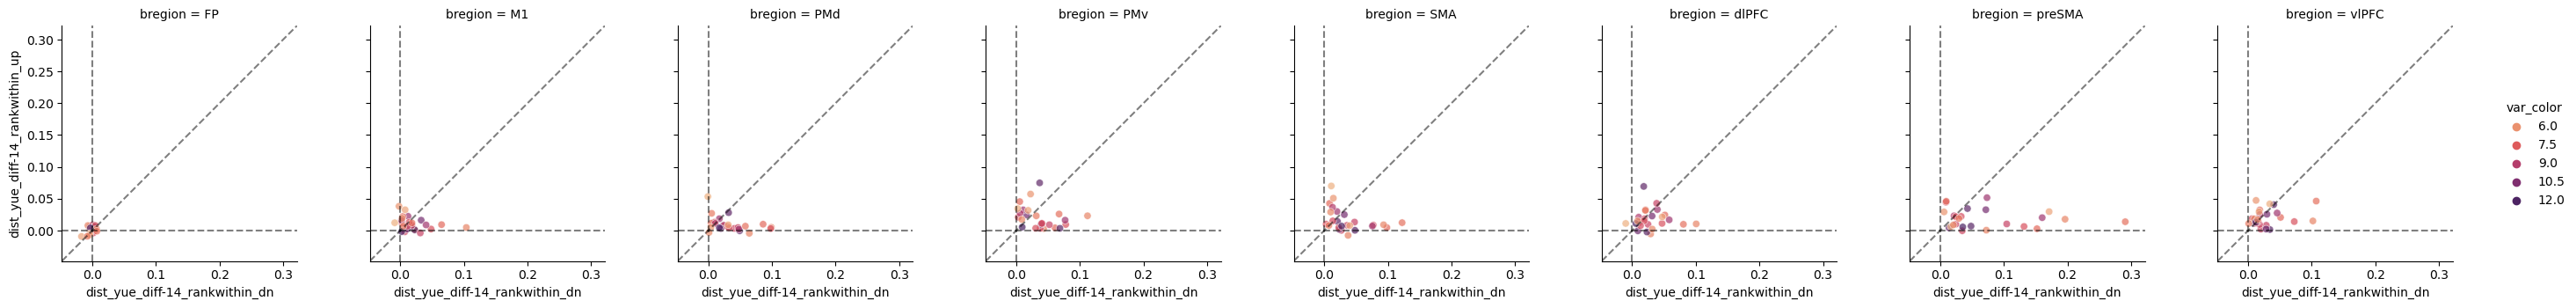

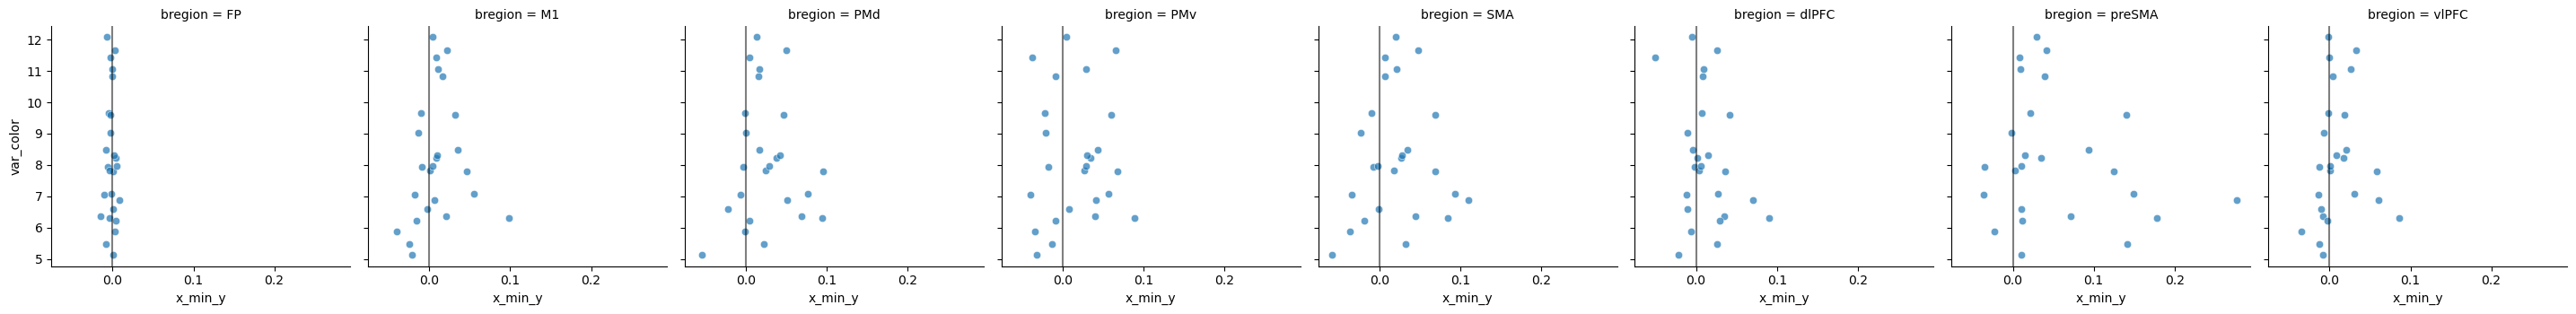

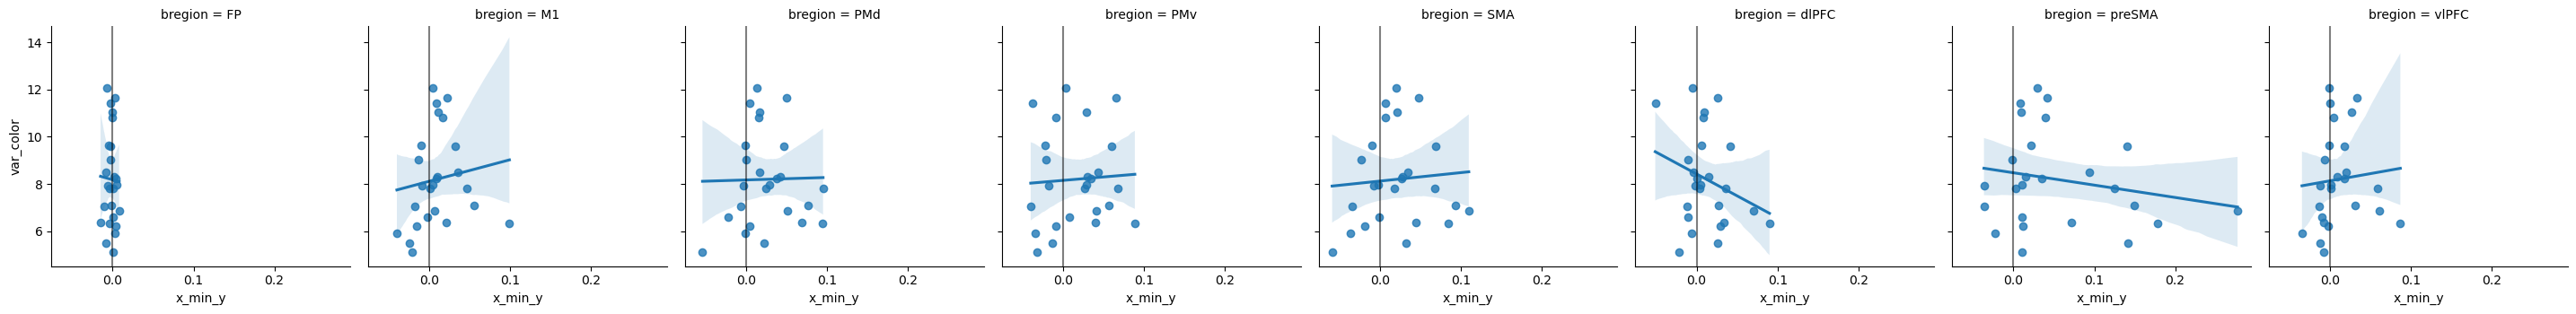

In [28]:
from pythonlib.tools.pandastools import plot_45scatter_color_by_var
var_subplot = "bregion"
var_manip = "effect"
var_value = "dist_yue_diff"
x_lev_manip = "14_rankwithin_dn"
y_lev_manip = "14_rankwithin_up"

var_color = "n2"

fig1, fig2, fig3 = plot_45scatter_color_by_var(dfeffect_this, var_manip, x_lev_manip, y_lev_manip,
                                           var_subplot, var_value, var_datapt, 
                                           var_color)

In [ ]:
dfeffect_pivot["x_min_y"] = dfeffect_pivot[_xvar] - dfeffect_pivot[_yvar]

In [ ]:
fig = sns.relplot(data=dfeffect_pivot, x="x_min_y", y="gap_dur-14_rankwithin_dn", 
                  col="bregion", kind="scatter", height=3.6, alpha=0.7, palette="flare")

# sns.displot(data=dfeffect_pivot, x="dist_yue_diff-14_rankwithin_dn", y="dist_yue_diff-14_rankwithin_up", 
# c = dfeffect_pivot["gap_dur-14_rankwithin_dn"])

for ax in fig.axes.flatten():
    ax.axhline(0, color="k", alpha=0.5)
    ax.axvline(0, color="k", alpha=0.5)



In [ ]:
dfeffect_pivot

In [ ]:
dfeffect["da_cr_sh_12"].unique().tolist()

In [ ]:
dfgaps_agg["da_cr_sh_12"].unique().tolist()

In [ ]:
dftmp = slice_by_row_label(dfgaps_agg, "da_cr_sh_12", row_values, assert_exactly_one_each=True)


##### Devo (Scatterplot, coloring by gap durations)

In [ ]:
savedir = "/tmp"


In [ ]:
dfeffect["date"]

In [ ]:
# First, extract the dfeffect
from pythonlib.dataset.dataset_analy.grammar import chunk_rank_global_extract
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping_color_mapper
_HACK = True # Untru this after fix the epoch naems for cross-AB dates.

# Will assume these, so verify

# This date epochs not set well, will fail
if _HACK:
    dfeffect = DFEFFECT[~(DFEFFECT["date"].isin([240822, 240827]))].reset_index(drop=True)
else:
    dfeffect = DFEFFECT.reset_index(drop=True)

# Get chunk rank global
try:
    _ = chunk_rank_global_extract(dfeffect, shape_ratio_max= 0.99)
    list_var_to_color = [None, "chunk_rank_12", "chunk_rank_global"]
except Exception as err:
    list_var_to_color = [None, "chunk_rank_12"]



In [ ]:
# First, 

##### [MULT] making rsa heatmap showing relationship between ranks within. Loads the raw dfdist

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script_MULT import load_preprocess_get_dates
import os
import pandas as pd

RUN = 27 
save_suffix = "AnBmCk_general"
yvar = "dist_yue_diff"
analysis = "n_in_chunk"
question = "11_twoshapes"
# bregions_only = None
bregions_only = ["preSMA"]

for animal in ["Diego", "Pancho"]:
# for animal in ["Pancho"]:
    list_dates, _, _, _ = load_preprocess_get_dates(animal, save_suffix)
    list_dates = list(set(list_dates))

    for date in list_dates:
    # for date in [220909]:
        
        ### Load data
        SAVEDIR_PLOTS = f"/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run{RUN}/MULT/compare_ranks_within/{animal}-{date}"
        os.makedirs(SAVEDIR_PLOTS, exist_ok=True)
        path = f"/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run{RUN}/MULT/DFDIST-{animal}-{date}.pkl"
        if not os.path.exists(path):
            continue
        DFDIST = pd.read_pickle(path)
        DFDIST = DFDIST[DFDIST["question"] == question].reset_index(drop=True)

        ### Preprocess, etc.
        from pythonlib.tools.pandastools import append_col_with_grp_index
        for i in [1, 2]:
            DFDIST = append_col_with_grp_index(DFDIST, [f"chunk_rank_{i}", f"shape_{i}", f"chunk_n_in_chunk_{i}", f"chunk_within_rank_{i}"], f"role_{i}")

        # PRune to the relevant data
        from neuralmonkey.analyses.euclidian_distance import dfdist_expand_convert_from_triangular_to_full, dfdist_convert_merge_pair_to_get_all_levels, dfdist_variables_effect_extract_helper, dfdist_variables_generate_var_same
        from neuralmonkey.scripts.analy_syntax_good_eucl_state import targeted_pca_clean_plots_and_dfdist_params
        label_vars = targeted_pca_clean_plots_and_dfdist_params()["map_question_to_euclideanvars"][question]
        contrasts_diff = []
        contrasts_either = ["chunk_within_rank", "chunk_rank", "shape", "chunk_n_in_chunk"]
        var_same = dfdist_variables_generate_var_same(label_vars)
        dfdist = dfdist_variables_effect_extract_helper(DFDIST, var_same, label_vars, contrasts_diff, contrasts_either)
        dfdist = dfdist[dfdist["task_kind_12"] == "prims_on_grid|prims_on_grid"].reset_index(drop=True)
        # aggregGeneral(DFDIST, ["question", "bregion", "subspace"], ["dist_yue_diff"])
        # Expand, so that all pairs are represnted
        dfdist_full = dfdist_expand_convert_from_triangular_to_full(dfdist, label_vars, False)

        # Agg over location etc (datapt = relevant variables)
        from pythonlib.tools.pandastools import aggregGeneral
        dfdist_full = aggregGeneral(dfdist_full, ["question", "bregion", "subspace", 
                            "chunk_within_rank_1", "chunk_within_rank_2", 
                            "chunk_within_rank_fromlast_1", "chunk_within_rank_fromlast_2",
                            "chunk_rank_1", "chunk_rank_2",
                            "chunk_n_in_chunk_1", "chunk_n_in_chunk_2", 
                            "shape_1", "shape_2",
                            ], ["dist_yue_diff"])

        # Recommpute chunk withi nrank from last if it doesnt exist
        import numpy as np
        for i in [1, 2]:
            tmp = []
            for _, row in dfdist_full.iterrows():
                if row[f"chunk_within_rank_fromlast_{i}"] == "none":
                    # Then recompute
                    assert row[f"chunk_within_rank_{i}"] != "none"
                    assert row[f"chunk_within_rank_{i}"]>=0
                    this = row[f"chunk_within_rank_{i}"] - row[f"chunk_n_in_chunk_{i}"]
                    # print(row[f"chunk_n_in_chunk_{i}"], row[f"chunk_within_rank_{i}"], this)
                else:
                    this = row[f"chunk_within_rank_fromlast_{i}"]
                tmp.append(this)
                assert -this <= row[f"chunk_n_in_chunk_{i}"]
                if this == -3:
                    assert row[f"chunk_n_in_chunk_{i}"]>2
                    # print(row[f"chunk_n_in_chunk_{i}"])
                # assert np.abs(tmp[-1])<=row[f"chunk_n_in_chunk_{i}"]
            dfdist_full[f"chunk_within_rank_fromlast_{i}"] = tmp
        # Sanity checks:
        # dfdist[dfdist["chunk_n_in_chunk_1"] < -dfdist["chunk_within_rank_fromlast_1"]]
        # dfdist.loc[:, ["chunk_n_in_chunk_1", "chunk_within_rank_1", "chunk_within_rank_fromlast_1"]]
        # dfdist_full[dfdist_full["chunk_n_in_chunk_2"] < -dfdist_full["chunk_within_rank_fromlast_2"]].loc[:, ["labels_1", "chunk_n_in_chunk_1", "chunk_within_rank_1", "chunk_within_rank_fromlast_1"]]

        # A new conjunctive "role" variable.
        for i in [1, 2]:
            # dfdist_full = append_col_with_grp_index(dfdist_full, [f"shape_{i}", f"chunk_n_in_chunk_{i}", f"chunk_within_rank_{i}"], f"role_{i}")
            dfdist_full = append_col_with_grp_index(dfdist_full, [f"shape_{i}", f"chunk_n_in_chunk_{i}", f"chunk_within_rank_fromlast_{i}"], f"role_{i}")
            dfdist_full = append_col_with_grp_index(dfdist_full, [f"chunk_n_in_chunk_{i}", f"chunk_within_rank_{i}"], f"n_rank_{i}")
            dfdist_full = append_col_with_grp_index(dfdist_full, [f"chunk_n_in_chunk_{i}", f"chunk_within_rank_fromlast_{i}"], f"n_ranklast_{i}")
            dfdist_full = append_col_with_grp_index(dfdist_full, [f"shape_{i}", f"chunk_n_in_chunk_{i}"], f"shape_n_{i}")
        dfdist_full["chunk_within_rank_1min2"] = dfdist_full["chunk_within_rank_1"] - dfdist_full["chunk_within_rank_2"]
        dfdist_full["chunk_within_rank_fromlast_1min2"] = dfdist_full["chunk_within_rank_fromlast_1"] - dfdist_full["chunk_within_rank_fromlast_2"]
        
        ### Plots
        from pythonlib.tools.pandastools import plot_subplots_heatmap
        import matplotlib.pyplot as plt
        import seaborn as sns
        from pythonlib.tools.plottools import savefig
        list_bregion = dfdist_full["bregion"].unique().tolist()
        for bregion in list_bregion:

            if (bregions_only is not None) and (bregion not in bregions_only):
                continue
            
            ### Heatmaps
            df = dfdist_full[
                (dfdist_full["bregion"] == bregion) &  
                (dfdist_full["chunk_rank_1"] == dfdist_full["chunk_rank_2"]) & 
                (dfdist_full["shape_1"] == dfdist_full["shape_2"])
                ].reset_index(drop=True)

            # plot_subplots_heatmap(df, "role_1", "role_2", "dist_yue_diff", "shape_12", False, False, W = 8)
            # plot_subplots_heatmap(df, "role_1", "role_2", "dist_yue_diff", None, False, False, W = 8)
            fig, _ = plot_subplots_heatmap(df, "role_1", "role_2", "dist_yue_diff", "shape_1", False, False, W = 8)
            savefig(fig, f"{SAVEDIR_PLOTS}/{bregion}-heatmap-same_shape-1.pdf")
            plt.close("all")

            ### Catplots
            for only_if_diff_n in [False, True]:
                if only_if_diff_n:
                    df = dfdist_full[
                        (dfdist_full["bregion"] == bregion) &  
                        (dfdist_full["chunk_rank_1"] == dfdist_full["chunk_rank_2"]) & 
                        (dfdist_full["shape_1"] == dfdist_full["shape_2"]) & 
                        (dfdist_full["chunk_n_in_chunk_1"] != dfdist_full["chunk_n_in_chunk_2"])
                        ].reset_index(drop=True)
                else:
                    df = dfdist_full[
                        (dfdist_full["bregion"] == bregion) &  
                        (dfdist_full["chunk_rank_1"] == dfdist_full["chunk_rank_2"]) & 
                        (dfdist_full["shape_1"] == dfdist_full["shape_2"])
                        ].reset_index(drop=True)

                savedir = f"{SAVEDIR_PLOTS}/only_if_diff_n={only_if_diff_n}"
                os.makedirs(savedir, exist_ok=True)

                # Good plot
                # Plot aligned from end
                col_order = sorted(df["n_ranklast_2"].unique())
                fig = sns.catplot(data=df, x="chunk_within_rank_fromlast_1", y = yvar, hue="chunk_n_in_chunk_1", 
                    row="shape_2", col="n_ranklast_2", kind="point", errorbar="se", col_order=col_order)
                savefig(fig, f"{savedir}/{bregion}-catplot-1a.pdf")

                # Plot aligned from onset
                col_order = sorted(df["n_rank_2"].unique())
                fig = sns.catplot(data=df, x="chunk_within_rank_1", y = yvar, hue="chunk_n_in_chunk_1", 
                    row="shape_2", col="n_rank_2", kind="point", errorbar="se", col_order=col_order)
                savefig(fig, f"{savedir}/{bregion}-catplot-1b.pdf")

                # Good plot
                # col_order = sorted(df["n_ranklast_2"].unique())
                # fig = sns.catplot(data=df, x="chunk_within_rank_fromlast_1min2", y = yvar, hue="chunk_n_in_chunk_1", 
                #     row="shape_2", col="n_ranklast_2", kind="point", errorbar="se", col_order=col_order)
                # savefig(fig, f"{savedir}/{bregion}-catplot-3.pdf")

                # Good plot
                col_order = sorted(df["chunk_within_rank_fromlast_2"].unique())
                fig = sns.catplot(data=df, x="chunk_within_rank_fromlast_1", y = yvar, hue="chunk_n_in_chunk_1", 
                    row="shape_2", col="chunk_within_rank_fromlast_2", kind="point", errorbar="se", col_order=col_order)
                savefig(fig, f"{savedir}/{bregion}-catplot-2a.pdf")

                col_order = sorted(df["chunk_within_rank_2"].unique())
                fig = sns.catplot(data=df, x="chunk_within_rank_1", y = yvar, hue="chunk_n_in_chunk_1", 
                    row="shape_2", col="chunk_within_rank_2", kind="point", errorbar="se", col_order=col_order)
                savefig(fig, f"{savedir}/{bregion}-catplot-2b.pdf")

                # Summary good.
                # for hue in ["n_ranklast_2", "chunk_within_rank_fromlast_2"]:
                for hue in ["chunk_within_rank_fromlast_2"]:
                    fig = sns.catplot(data=df, x="chunk_within_rank_fromlast_1", y = yvar, hue=hue, 
                                    col="shape_2", col_wrap=10, kind="point", errorbar="se")
                    savefig(fig, f"{savedir}/{bregion}-catplot-3a-{hue}.pdf")

                # for hue in ["n_rank_2", "chunk_within_rank_2"]:
                for hue in ["chunk_within_rank_2"]:
                    fig = sns.catplot(data=df, x="chunk_within_rank_1", y = yvar, hue=hue, 
                                    col="shape_2", col_wrap=10, kind="point", errorbar="se")
                    savefig(fig, f"{savedir}/{bregion}-catplot-3b-{hue}.pdf")

                # Summary combining shapes
                for this in ["chunk_within_rank_fromlast", "chunk_within_rank"]:
                    fig = sns.catplot(data=df, x=f"{this}_1", y = yvar, hue=f"{this}_2",
                                    kind="point", errorbar="se")
                    savefig(fig, f"{savedir}/{bregion}-catplot-4-{this}.pdf")

                    # Finaly summary all aligned to 0 (combine shapes and n chunk)
                    fig = sns.catplot(data=df, x=f"{this}_1min2", y = yvar, hue=f"{this}_2",
                                    kind="point", errorbar="se")
                    savefig(fig, f"{savedir}/{bregion}-catplot-5-{this}.pdf")


                plt.close("all")

In [ ]:
# Other plots comparing rank_within, but here using dfeffect

In [ ]:
from pythonlib.tools.pandastools import plot_subplots_heatmap
import matplotlib.pyplot as plt
list_bregion = DFEFFECT["bregion"].unique().tolist()
for bregion in list_bregion:
    dfeffect = DFEFFECT[(DFEFFECT["effect"] == "11_ninchunk_ss=global") & (DFEFFECT["bregion"] == bregion)].reset_index(drop=True)
    fig, axes = plot_subplots_heatmap(dfeffect, "chunk_n_in_chunk_12", "chunk_within_rank_12", yvar, "date", share_zlim=True);
    savefig(fig, f"{savedir}/{bregion}.pdf")
    plt.close("all")


In [ ]:
from neuralmonkey.analyses.euclidian_distance import dfdist_expand_convert_from_triangular_to_full, dfdist_convert_merge_pair_to_get_all_levels
dfmerge = dfdist_convert_merge_pair_to_get_all_levels(DFEFFECT, ["chunk_n_in_chunk", "chunk_within_rank", "shape"], ["date"])

# use dfmerge to extract 

In [ ]:
dfeffect

In [ ]:
# N in chunk, plotting separately as function of rank_within_chunk
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(DFEFFECT, ["date", "effect", "chunk_within_rank_12", "chunk_n_in_chunk_12"])


In [ ]:
# SCRATCH
if False:
    DFEFFECT_ALL["labels_12_unique"] = [tuple(sorted([row["labels_1"], row["labels_2"]])) for _, row in DFEFFECT_ALL.iterrows()]
    from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper
    dfeffect = DFEFFECT_ALL[DFEFFECT_ALL["effect"].isin([eff1, eff2])].reset_index(drop=True)
    extract_with_levels_of_conjunction_vars_helper(dfeffect, "effect", ["labels_12_unique", "date"], levels_var=[eff1, eff2])
    _, fig = plot_45scatter_means_flexible_grouping(DFEFFECT_ALL, "effect", eff1, eff2, "bregion", yvar, "labels_12_unique", shareaxes=True, plot_error_bars=False);

    from pythonlib.tools.pandastools import grouping_print_n_samples
    grouping_print_n_samples(dfeffect, ["date", "effect", "labels_12_unique"])
    DFEFFECT_ALL
    
if False:
    # For each date, compute the ratio
    var_datapt = "date"

    from pythonlib.tools.pandastools import summarize_featurediff
    dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF, dfpivot = summarize_featurediff(
        dfeffect, "effect", [eff2, eff1], ["dist_yue_diff"], ["bregion", var_datapt], return_dfpivot=True)

    dfpivot["eff2_over_eff1_log2"] = np.log2(dfpivot["dist_yue_diff"][eff2]/dfpivot["dist_yue_diff"][eff1])
    for _, row in dfpivot.iterrows():
        # print((row["bregion"], row["date"]))
        print((row["bregion"][0], row["date"][0]))
        assert False
        print(row["eff2_over_eff1_log2"])
    # Put back into dfeffect
    from pythonlib.tools.pandastools import slice_by_row_label, append_col_with_grp_index
    # dfpivot = append_col_with_grp_index(dfpivot, ["bregion", "date"], "br_date")
    # dfeffect = append_col_with_grp_index(dfeffect, ["bregion", "date"], "br_date")

    map_brdate_to_log = {(row["bregion"][0], row["date"][0]):row["eff2_over_eff1_log2"][0] for _, row in dfpivot.iterrows()}
    map_brdate_to_log
    dfeffect["eff2_over_eff1_log2"] = [map_brdate_to_log[(row["bregion"], row["date"])] for _, row in dfeffect.iterrows()]
    dfres, fig = plot_45scatter_means_flexible_grouping(dfeffect, "effect", eff1, eff2, None, yvar, "bregion", shareaxes=True, plot_error_bars=False);

    dfeffect_this = dfeffect[dfeffect["effect"] == eff1].reset_index(drop=True)
    from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping_from_wideform
    plot_45scatter_means_flexible_grouping_from_wideform(dfeffect_this, "dist_yue_diff", "eff2_over_eff1_log2", None, "bregion", shareaxes=True);
    # _, fig = plot_45scatter_means_flexible_grouping(dfeffect_this, "effect", eff1, eff2, None, yvar, "bregion", shareaxes=True);



##### [Debugging] Figuring out why not all rows have same DIST_98 for a given bregion

In [ ]:
# Solved -- is beucase agging over splits in original extraction, each may have diff DIST_98 and lose certain conjucntions.

In [ ]:
sns.catplot(data=DFDIST, x="bregion", y="DIST_98", hue="question", col="subspace", row="task_kind_12")


In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
ax.plot(dfdist["DIST_98"], dfdist["labels_1"], "xk")

In [ ]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good, stringify_values
DFDIST_THIS = stringify_values(DFDIST)


In [ ]:

grpdict = grouping_append_and_return_inner_items_good(DFDIST_THIS, ["bregion","question", "task_kind_12"])
for grp, inds in grpdict.items():

    dfdist = DFDIST_THIS.iloc[inds].reset_index(drop=True)
    # sns.catplot(data=dfdist, x="labels_1", hue="labels_2", y="DIST_98", height=20)

    from pythonlib.tools.pandastools import plot_subplots_heatmap
    plot_subplots_heatmap(dfdist, "labels_1", "labels_2", "DIST_98", "subspace", W=8, share_zlim=True)
    assert False

##### [OLDER PLOTS] Plots

In [ ]:
import seaborn as sns

if run==1:
    order = ['0|0|0', '0|1|1', '1|0|1', '0|0|1', '1|1|0', '1|0|0', '1|1|1']
elif run==3:
    order = [
    '0|0|1|1',
    '0|0|1|0',
    '0|1|1|1',
    '0|1|1|0',
    '1|0|1|1',
    '1|0|1|0',
    '1|1|0|1',
    '1|1|0|0',
    '1|1|1|0',
    ]
else:
    order = sorted(DFDIST[colname_conj_same].unique())

if False: # good, but takes  long time to plot all datapts
    sns.catplot(data=DFDIST, x="bregion", y="dist_yue_diff", hue_order=order,
                col="subspace", row=colname_conj_same, jitter=True, alpha=0.5)

sns.catplot(data=DFDIST, x="bregion", hue=colname_conj_same, y="dist_yue_diff", hue_order=order,
            col="subspace", kind="bar", errorbar="se")
fig = sns.catplot(data=DFDIST, x=colname_conj_same, hue="subspace", y="dist_yue_diff", order=order,
            col="bregion", kind="bar", errorbar="se")
from pythonlib.tools.snstools import rotateLabel
rotateLabel(fig)

##### Plots of effects that are within-chunk

In [ ]:
# get effects for chunk_within_rank, separately for each chunk_shape
DFDIST = append_col_with_grp_index(DFDIST, ["chunk_rank_1", "shape_1"], "chunk_shape_1")
DFDIST = append_col_with_grp_index(DFDIST, ["chunk_rank_2", "shape_2"], "chunk_shape_2")

# Keep only these
dfdist = DFDIST[(DFDIST["shape_same"] == True) & (DFDIST["chunk_rank_same"] == True) & (DFDIST["same-chunk_within_rank|chunk_rank|shape"] == "0|1|1")]
assert all(dfdist["chunk_shape_1"] == dfdist["chunk_shape_2"])

sns.catplot(data=dfdist, x="bregion", hue="chunk_shape_1", y="dist_yue_diff", col="subspace", kind="bar")

### Testing kernel trick

##### Testing oridnal regression for analyzing rank-within

In [ ]:
# Plot state space

In [ ]:
import os
from neuralmonkey.scripts.analy_syntax_good_eucl_state import targeted_pca_clean_plots_and_dfdist_params, preprocess_pa

In [ ]:
SAVEDIR_ALL = "/tmp/SYNTAX_ORDINAL_REGRESSION"
os.makedirs(SAVEDIR_ALL, exist_ok=True)


In [ ]:
from pythonlib.tools.plottools import savefig
import matplotlib.pyplot as plt
import pandas as pd
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single_one_var_mult_axes
from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good

DEBUG = True

### DEBUG -- quick testing
if DEBUG:
    bregions_get = ["PMv"]
    n_splits = 1
    do_subspaces_within_chunk = False
else:
    bregions_get = None
    n_splits = 3 # make this high, since with splits you might lose certain low-n labels tuples.
    # do_subspaces_within_chunk = True
    do_subspaces_within_chunk = False

# Stratified splits params
# Better, more careful, ensuring enough data for euclidian distance.
fraction_constrained_set=0.4
n_constrained=2 # Ideally have more than 1 pair
list_labels_need_n=None
min_frac_datapts_unconstrained=None
# min_n_datapts_unconstrained=len(PAscal.Xlabels["trials"][_var_effect].unique())
min_n_datapts_unconstrained=None
plot_train_test_counts=True
plot_indices=False

# Scalar preprocessing
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
_list_twind, _, _ = _get_list_twind_by_animal(animal, "00_stroke", "traj_to_scalar")
twind_scal = _list_twind[0]
npcs_keep_force = 50

# tbin_dur = 0.2
# tbin_slide = 0.1
tbin_dur = 0.15
tbin_slide = 0.075

# Regression variables (and also, variables that are candidates for subspaces)
# Run 1 (7/31/25)
# variables = ['epoch', 'chunk_rank', 'shape', 'gridloc', 'CTXT_loc_prev', 'CTXT_shape_prev', 'chunk_within_rank', 'stroke_index_is_first']

# Run 2 (8/1/25)
# variables = ['epoch', 'gridloc', 'DIFF_gridloc', 'shape', 'chunk_rank', 'chunk_within_rank']
# variables = ['epoch', 'gridloc', 'DIFF_gridloc', 'shape', 'DIFF_shape', 'chunk_rank', 'chunk_within_rank', 'chunk_within_rank_fromlast', 'chunk_n_in_chunk']
variables = ['epoch', 'gridloc', 'DIFF_gridloc', 'shape', 'chunk_rank', 'chunk_within_rank', 'chunk_within_rank_fromlast', 'chunk_n_in_chunk'] # Removing diff shape, it is too correlated with chunk rank?
variables_is_cat = [True for _ in range(len(variables))]

### Subspace params
# list_var_subspace = ["chunk_within_rank", "chunk_rank", "chunk_within_rank_fromlast", "chunk_n_in_chunk", "shape", "gridloc"]
list_var_subspace = ["chunk_within_rank_fromlast"]

### State space plots params
LIST_VAR_VAROTHERS = [
    # ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    # ("chunk_within_rank", ['epoch', 'chunk_shape', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),
    # ("chunk_shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev', 'loc_off_clust']),
    # ("chunk_shape", ['epoch', 'chunk_within_rank', 'loc_on_clust', 'CTXT_locoffclust_prev', 'CTXT_shape_prev']),

    ## N in chunk
    ("chunk_n_in_chunk", ['task_kind', 'epoch', 'chunk_shape', 'chunk_within_rank']),
    ("chunk_n_in_chunk", ['task_kind', 'epoch', 'chunk_shape']),
    ("chunk_n_in_chunk", ['task_kind', 'epoch']),

    ## Rank within
    ("chunk_within_rank", ['task_kind', 'epoch', 'chunk_shape', 'chunk_within_rank_fromlast']),
    ("chunk_within_rank", ['task_kind', 'epoch', 'chunk_shape', 'chunk_n_in_chunk']),
    ("chunk_within_rank", ['task_kind', 'epoch', 'chunk_shape']),
    ("chunk_within_rank", ['task_kind', 'epoch']),

    ("chunk_within_rank_fromlast", ['task_kind', 'epoch', 'chunk_shape', 'chunk_within_rank']),
    ("chunk_within_rank_fromlast", ['task_kind', 'epoch', 'chunk_shape', 'chunk_n_in_chunk']),
    ("chunk_within_rank_fromlast", ['task_kind', 'epoch', 'chunk_shape']),
    ("chunk_within_rank_fromlast", ['task_kind', 'epoch']),

    ## Stroke index (generic)
    ("stroke_index", ['task_kind', 'epoch', 'syntax_concrete']),
    # ("stroke_index", ['epoch', 'chunk_shape']),
    ("stroke_index", ['task_kind', 'epoch']),

    ## Location
    ("gridloc_x", ['task_kind', 'epoch', 'chunk_shape', 'chunk_within_rank_v2']),
    # ("gridloc_x", ['epoch', 'syntax_concrete']),
    # ("gridloc_x", ['epoch', 'chunk_shape']),
    ("gridloc_x", ['task_kind', 'epoch']),

    ## Chunk rank and shape
    # ("chunk_shape", ['epoch', 'chunk_within_rank', 'syntax_concrete']),
    # ("chunk_shape", ['epoch', 'chunk_within_rank']),
    # ("chunk_shape", ['epoch']),

    # ("chunk_rank", ['epoch', 'shape', 'chunk_within_rank']),
    ("chunk_rank", ['task_kind', 'epoch', 'shape']),
    ("chunk_rank", ['task_kind', 'epoch']),

    # ("shape", ['epoch', 'chunk_rank', 'chunk_within_rank']),
    ("shape", ['epoch', 'task_kind', 'chunk_rank']),
    ("shape", ['epoch', 'task_kind']),

    ("task_kind", ["epoch", "shape"]),
]
LIST_DIMS = [(0,1), (1,2)]

### Euclidean dist params (ie one set for each "question")
# 1: Two things: (1) rank within an dsimple within vs. chunk vs. motor (shape, gridloc)
# TODO: possibly also exclude gridloc. Note that this leads to larger effects of grammar stuff even in M1. Is cleaner this way.
# TODO: possibly also include DIFF_gridloc. But problem is that then there is not much data..
map_question_to_euclideanvars = targeted_pca_clean_plots_and_dfdist_params()["map_question_to_euclideanvars"]
euclidean_npcs_keep = 8

for _, row in DFallpa.iterrows():
    bregion = row["bregion"]
    PA = row["pa"]

    if (bregions_get is not None) and (bregion not in bregions_get):
        continue
    
    SAVEDIR = f"{SAVEDIR_ALL}/bregion={bregion}"
    os.makedirs(SAVEDIR, exist_ok=True)

    prune_min_n_trials = 3
    filtdict = {}
    prune_min_n_levs = 2
    # use these regardless of what subspace, as they are good for pruning
    _var_effect = "chunk_within_rank_semantic_v2"
    _vars_others = ["epoch", "chunk_shape", "syntax_concrete", "task_kind"]
    PA = preprocess_pa(PA, _var_effect, _vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
                SAVEDIR, 
                None, None, None, None, None, 
                skip_dimredu=True, prune_by_conj_var=False)

    # Do dim reduction of PA up here, to be able to skip it below (quicker)
    savedir_pca = f"{SAVEDIR}/pca"
    os.makedirs(savedir_pca, exist_ok=True)
    _, PAscal = PA.dataextract_dimred_wrapper("scal", "pca", savedir_pca, twind_scal, tbin_dur, tbin_slide,
                                npcs_keep_force)            

    assert False
    ### Method 1: Use entire data for fitting and projecting (with cross-validation)
    # Now split into train (fitting targeted PCA) and testing (projection).

    ### Get subsamples
    vars_stratification = ["epoch", "chunk_within_rank_semantic_v2", "chunk_shape", "syntax_concrete", "task_kind"]
    folds_dflab, fig_unc, fig_con = PAscal.split_stratified_constrained_grp_var(n_splits, vars_stratification, 
                                                    fraction_constrained_set, n_constrained, 
                                                    list_labels_need_n, min_frac_datapts_unconstrained,  
                                                    min_n_datapts_unconstrained, plot_train_test_counts, plot_indices)
    savefig(fig_con, f"{SAVEDIR}/after_split_constrained_fold_0.pdf") # TEST
    savefig(fig_unc, f"{SAVEDIR}/after_split_unconstrained_fold_0.pdf") # TRIAN
    plt.close("all")


    # Save some params
    from pythonlib.tools.expttools import writeDictToYaml, writeDictToTxtFlattened
    writeDictToYaml({
        "vars_stratification":vars_stratification,
        "map_question_to_euclideanvars":map_question_to_euclideanvars,
        "euclidean_npcs_keep":euclidean_npcs_keep,
        "LIST_VAR_VAROTHERS":LIST_VAR_VAROTHERS,
        "list_var_subspace":list_var_subspace,
        "variables":variables,
        "variables_is_cat":variables_is_cat,
        "twind_scal":twind_scal,
    }, f"{SAVEDIR}/params.yaml")
    writeDictToTxtFlattened({
        "vars_stratification":vars_stratification,
        "map_question_to_euclideanvars":map_question_to_euclideanvars,
        "euclidean_npcs_keep":euclidean_npcs_keep,
        "LIST_VAR_VAROTHERS":LIST_VAR_VAROTHERS,
        "list_var_subspace":list_var_subspace,
        "variables":variables,
        "variables_is_cat":variables_is_cat,
        "twind_scal":twind_scal,
    }, f"{SAVEDIR}/params.txt")

    for i_proj, (train_inds, test_inds) in enumerate(folds_dflab):
        
        # train_inds has FEWER inds than test_inds
        train_inds = [int(i) for i in train_inds]
        test_inds = [int(i) for i in test_inds]
        print("n_train, n_test:", len(train_inds), len(test_inds))

        # HACK: Single prims trials should always be in test inds, not train inds.
        dflab = PAscal.Xlabels["trials"]
        inds_sp = dflab[dflab["task_kind"]=="prims_single"].index.tolist()
        test_inds = test_inds + [i for i in train_inds if i in inds_sp]
        train_inds = [i for i in train_inds if i not in inds_sp]

        # Then run this: state_space_targeted_pca_scalar_single_one_var_mult_axes
        # TODO: split the training and testing
        for var_subspace in list_var_subspace:

            savedir = f"{SAVEDIR}/FITTING_subspc={var_subspace}-iter={i_proj}"
            os.makedirs(savedir, exist_ok=True)

            pa_subspace, _, _, dfcoeff, _ = state_space_targeted_pca_scalar_single_one_var_mult_axes(
                    PAscal, None, variables, variables_is_cat, var_subspace, npcs_keep_force, 
                    LIST_VAR_VAROTHERS, LIST_DIMS, savedir, just_extract_paredu=False,
                    savedir_pca_subspaces=savedir, tbin_dur=tbin_dur, tbin_slide=tbin_slide,
                    inds_trials_pa_train=train_inds, inds_trials_pa_test=test_inds,
                    skip_dim_redu=True)

            assert False

In [ ]:
# Dont do subspace projection, just use all data
pa_subspace = PAscal

In [ ]:
# prune to top two dimesinos
assert False, "do this correctly"
pa_subspace.X = pa_subspace.X[:2, :, :]
pa_subspace.Chans = pa_subspace.Chans[:2]

In [ ]:
pa_subspace.X.shape, PAscal.X.shape

In [ ]:
from neuralmonkey.analyses.regression_good import kernel_ordinal_logistic_regression, _kernel_ordinal_logistic_regression_example
# kernel_ordinal_logistic_regression()
res = _kernel_ordinal_logistic_regression_example(rescale_std=False)


In [ ]:
savedir = f"{SAVEDIR}/kernel_ordinal_regress"
os.makedirs(savedir, exist_ok=True)
pa_subspace = pa_subspace.slice_by_labels_filtdict({"task_kind":["prims_on_grid"]})


In [ ]:
savedir = f"{SAVEDIR}/kernel_ordinal_regress"
os.makedirs(savedir, exist_ok=True)
pa_subspace = pa_subspace.slice_by_labels_filtdict({"task_kind":["prims_on_grid"]})


In [ ]:
# only keep classes with at least this many items

import numpy as np

# Example array
arr = np.array([1, 1, 1, 2, 2, 3, 3, 3, 4, 5, 5])
from pythonlib.tools.nptools import filter_array_to_include_minimum_n_items
filter_array_to_include_minimum_n_items(arr, 3)

In [ ]:
# Do testing on held-out data
if False:

    from pythonlib.tools.statstools import split_stratified_constrained_multiple
    nsplits = 10
    fraction_constrained_set = 0.75
    n_constrained = 2

    # each fold (unconstrainted, constrainted), ie (test, train)
    folds = split_stratified_constrained_multiple(Y, nsplits, fraction_constrained_set, n_constrained, PLOT=False)

    for inds_test, inds_train in folds:
        print(len(inds_test), len(inds_train))

    from sklearn.metrics import balanced_accuracy_score, accuracy_score
    y_actual = [1,1,2,2,2, 2, 0]
    y_pred = [1, 1, 1, 2, 2, 2, 0]
    balanced_accuracy_score(y_actual, y_pred)

In [ ]:
yvar = "chunk_within_rank_fromlast"

# dflab = pa_subspace.Xlabels["trials"]
# Y = dflab[yvar].values
# Y = Y - min(Y)
# Y = Y.astype(np.int64)

# dflab[f"{yvar}-ord"] = Y
# pa_subspace.Xlabels["trials"] = dflab
from neuralmonkey.scripts.analy_syntax_good_eucl_state import kernel_ordinal_logistic_regression_wrapper
vars_grp = ["task_kind", "epoch", "chunk_shape", "chunk_n_in_chunk"]
# yvar_ord = f"{yvar}-ord"
dfcross, dfwithin = kernel_ordinal_logistic_regression_wrapper(pa_subspace, yvar, vars_grp, savedir, plot_test_data_projected=False)


##### Loading pre-saved pa_subspace, and then run

In [ ]:
import os
# from pythonlib.tools.pandastools import 

In [ ]:
# TODO: why only 5 for train?
# 

In [ ]:
import warnings

warnings.filterwarnings("default")


In [ ]:
dflab = pa_subspace_this_PIG.Xlabels["trials"]
type(dflab[yvar].values[0])

In [ ]:
# TODO: control for n in chunk, and also don't contrl (as the former removes a lot of data).

In [ ]:
animal = "Diego"
date = 230913
nsplits = 10
# for bregion in ["M1", "PMv", "preSMA", "PMd"]:
for bregion in ["preSMA", "PMd"]:

    savedir = f"/tmp/LOGISTIC/{animal}-{date}/{bregion}"
    os.makedirs(savedir, exist_ok=True)
    path = f"/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run12/{animal}-{date}-q=RULE_ANBMCK_STROKE/bregion={bregion}/FITTING_subspc=('epoch', 'gridloc', 'DIFF_gridloc', 'chunk_rank', 'shape', 'rank_conj')-iter=0/pa_subspace.pkl"
    import pickle
    with open(path, "rb") as f:
        pa_subspace = pickle.load(f)
    euclidean_npcs_keep = 6
    _npcs_keep_euclidean = min([euclidean_npcs_keep, pa_subspace.X.shape[0]])
    pa_subspace_this = pa_subspace.slice_by_dim_indices_wrapper("chans", list(range(_npcs_keep_euclidean)))
    
    from neuralmonkey.scripts.analy_syntax_good_eucl_state import kernel_ordinal_logistic_regression_wrapper
    yvar = "chunk_within_rank_fromlast"
    # vars_grp = ["task_kind", "epoch", "chunk_rank", "shape", "gridloc", "CTXT_loc_prev", "chunk_n_in_chunk"]
    vars_grp = ["task_kind", "epoch", "chunk_rank", "shape", "gridloc", "CTXT_loc_prev"]

    # vars_grp = ["epoch", "chunk_within_rank", "chunk_rank", "shape", "gridloc", "CTXT_loc_prev", "chunk_n_in_chunk", "task_kind"]

    savedir_this = f"{savedir}/kernel_ordinal_regress-yvar={yvar}"
    os.makedirs(savedir_this, exist_ok=True)

    # Exclude single prims
    pa_subspace_this_PIG = pa_subspace_this.slice_by_labels_filtdict({"task_kind":["prims_on_grid"]})

    # dflab = pa_subspace_this_PIG.Xlabels["trials"]
    # dflab[yvar] = dflab[yvar].astype(int)
    # pa_subspace_this_PIG.Xlabels["trials"] = dflab
    
    dfcross, dfwithin = kernel_ordinal_logistic_regression_wrapper(pa_subspace_this_PIG, yvar, vars_grp, 
                                                                savedir_this, plot_test_data_projected=False, 
                                                                nsplits=nsplits)

    assert False

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state import kernel_ordinal_logistic_regression_wrapper_plot
savedir = "/tmp/REGRESS"
os.makedirs(savedir, exist_ok=True)
kernel_ordinal_logistic_regression_wrapper_plot(dfcross, dfwithin, vars_grp, savedir)

##### Dbugg

In [ ]:
# path = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run19/MULT/summary_each_date-yvar=dist_yue_diff/Diego-231118/DFEFFECT.pkl"
# dfeffect = pd.read_pickle(path)
# dfeffect["effect"].value_counts()
# from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_2_plot_single, targeted_pca_MULT_2_plot_single_load

# targeted_pca_MULT_2_plot_single("Diego", 230726, 19)

### Improving targeted PCA

In [ ]:
# Extract all motor params
from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_dfallpa_motor_features
preprocess_dfallpa_motor_features(DFallpa, plot_motor_values=True, do_zscore=True)

In [ ]:
### HEre, load a PAscal using the code from above (under ##### Testing oridnal regression for analyzing rank-within)

In [ ]:
# Do projection
variables_cont = ("motor_onsetx", "motor_onsety", "gap_from_prev_x", "gap_from_prev_y", "velmean_x", "velmean_y")
variables_cat = ("gridloc", "DIFF_gridloc", "stroke_index_is_first", "chunk_rank", "shape", "rank_conj")
vars_remove = ["motor_onsetx", "motor_onsety", "gap_from_prev_x", "gap_from_prev_y", 
            "velmean_x", "velmean_y", "gridloc", "DIFF_gridloc", "stroke_index_is_first"]

# var_subspace = "rank_conj"
var_subspace = ["rank_conj"]

pa_subspace, subspace_axes_orig, subspace_axes_normed, dfcoeff, pa_test, PAresid, original_feature_mapping = PAscal.dataextract_subspace_targeted_pca_subtract_confounds(variables_cont, variables_cat, vars_remove,
                                                             var_subspace, npcs_keep, normalization="orthonormal",
                                                             PLOT_COEFF_HEATMAP=False)

In [ ]:
vars_this_subspace = ["motor_onsetx", "motor_onsety", "gap_from_prev_x", "gap_from_prev_y", 
            "velmean_x", "velmean_y", "gridloc", "DIFF_gridloc"]
dfbases = PAscal.regress_neuron_task_variables_convert_coeff_to_basis(dfcoeff, vars_this_subspace, original_feature_mapping,
                                                             savedir_pca_subspaces)

In [ ]:
# Plot 
from neuralmonkey.scripts.analy_syntax_good_eucl_trial import state_space_targeted_pca_scalar_single_plot_
savedir = f"{SAVEDIR}/FITTING_subspc={var_subspace}-v5_good"
os.makedirs(savedir, exist_ok=True)
LIST_DIMS = [(0, 1), (2, 3), (4, 5)]
state_space_targeted_pca_scalar_single_plot_(pa_subspace, LIST_VAR_VAROTHERS, LIST_DIMS, savedir)


In [ ]:
##### Logging all the different methods

# Method 1(original): Project original data, not residuals
savedir = f"{SAVEDIR}/FITTING_subspc={var_subspace}-v6_final"
os.makedirs(savedir, exist_ok=True)
print(savedir)
train_inds=None
test_inds = None
pa_subspace, _, _, dfcoeff, _ = state_space_targeted_pca_scalar_single_one_var_mult_axes(
        PAscal, None, variables_cont, variables_cat, var_subspace, npcs_keep_force, 
        LIST_VAR_VAROTHERS, LIST_DIMS, savedir, just_extract_paredu=False,
        savedir_pca_subspaces=savedir, tbin_dur=tbin_dur, tbin_slide=tbin_slide,
        inds_trials_pa_train=train_inds, inds_trials_pa_test=test_inds,
        skip_dim_redu=True,
        do_vars_remove=True, vars_remove=vars_remove)

# Then, project PAresid to a subspace


# Method 1(original): Project original data, not residuals
savedir = f"{SAVEDIR}/FITTING_subspc={var_subspace}-iter={i_proj}-v1_noresid"
os.makedirs(savedir, exist_ok=True)
print(savedir)
pa_subspace, _, _, dfcoeff, _ = state_space_targeted_pca_scalar_single_one_var_mult_axes(
        PAscal, None, variables, None, var_subspace, npcs_keep_force, 
        LIST_VAR_VAROTHERS, LIST_DIMS, savedir, just_extract_paredu=False,
        savedir_pca_subspaces=savedir, tbin_dur=tbin_dur, tbin_slide=tbin_slide,
        inds_trials_pa_train=train_inds, inds_trials_pa_test=test_inds,
        skip_dim_redu=True)

# Method 2 (new): First get residuals, then project to subspace
savedir = f"{SAVEDIR}/FITTING_subspc={var_subspace}-iter={i_proj}-v2_resid"
os.makedirs(savedir, exist_ok=True)
print(savedir)
pa_subspace, _, _, dfcoeff, _ = state_space_targeted_pca_scalar_single_one_var_mult_axes(
        PAresid, None, [var_subspace], None, var_subspace, npcs_keep_force, 
        LIST_VAR_VAROTHERS, LIST_DIMS, savedir, just_extract_paredu=False,
        savedir_pca_subspaces=savedir, tbin_dur=tbin_dur, tbin_slide=tbin_slide,
        inds_trials_pa_train=train_inds, inds_trials_pa_test=test_inds,
        skip_dim_redu=True)

# Method 3 (new): First get residuals, then project to subspace (but as sanity check, use all variables)
savedir = f"{SAVEDIR}/FITTING_subspc={var_subspace}-iter={i_proj}-v3_resid"
os.makedirs(savedir, exist_ok=True)
print(savedir)
pa_subspace, _, _, dfcoeff, _ = state_space_targeted_pca_scalar_single_one_var_mult_axes(
        PAresid, None, variables, None, var_subspace, npcs_keep_force, 
        LIST_VAR_VAROTHERS, LIST_DIMS, savedir, just_extract_paredu=False,
        savedir_pca_subspaces=savedir, tbin_dur=tbin_dur, tbin_slide=tbin_slide,
        inds_trials_pa_train=train_inds, inds_trials_pa_test=test_inds,
        skip_dim_redu=True)


### Devo -- new kind of pipeline for euclidean distance

In [ ]:
# ie. see run7

In [ ]:
SAVEDIR = "/tmp/NEW_PIPELINE"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
savedir = f"{SAVEDIR}/{bregion}"
os.makedirs(savedir, exist_ok=True)


In [ ]:
# Project to a single generic space (capturing both syntax and motor effects)


# First, PCA to convert window to vector
savedir_pca = f"{SAVEDIR}/pca"
os.makedirs(savedir_pca, exist_ok=True)

from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _get_list_twind_by_animal
_list_twind, _, _ = _get_list_twind_by_animal(animal, "00_stroke", "traj_to_scalar")
twind_scal = _list_twind[0]
npcs_keep_force = 50
tbin_dur = 0.15
tbin_slide = 0.075
_, PAscal = PA.dataextract_dimred_wrapper("scal", "pca", savedir_pca, twind_scal, tbin_dur, tbin_slide,
                            npcs_keep_force)            


In [ ]:
if False:
    # Remove effect of first stroke.
    _savedir = f"{SAVEDIR}/remove_effect_first_stroke-coeff"
    os.makedirs(_savedir, exist_ok=True)
    _, _, _, _, _, PAscal, _ = PAscal.dataextract_subspace_targeted_pca_subtract_confounds(
                                                variables_cont_global, variables_cat_global, vars_remove_global,
                                                None, None, None,
                                                True, False,
                                                savedir_coeff_heatmap=_savedir,
                                                savedir_pca_subspaces=_savedir)


In [ ]:
# Keep just PIG
PAscal = PAscal.slice_by_labels_filtdict({"task_kind":["prims_on_grid"]})

In [ ]:
# Second, then targeted PCA to get signal
# - don't control for motor

variables_cont = []
variables_cat = ["epoch", "gridloc", "DIFF_gridloc", "chunk_rank", "shape", "rank_conj"]
vars_remove = None
var_subspace = variables_cat
npcs_keep = 10

pa_subspace, subspace_axes_orig, subspace_axes_normed, dfcoeff, pa_test, PAresid, original_feature_mapping = PAscal.dataextract_subspace_targeted_pca_subtract_confounds(variables_cont, variables_cat, vars_remove,
                                                             var_subspace, npcs_keep, 
                                                             PLOT_COEFF_HEATMAP=True, 
                                                             savedir_coeff_heatmap=savedir, demean=True)

In [ ]:
# To compute syntax effect, do maximal control of motor effect:

# Regress out motor stuff
variables_cont = ["motor_onsetx", "motor_onsety", "gap_from_prev_x", "gap_from_prev_y", "velmean_x", "velmean_y"]
variables_cat = ["epoch", "gridloc", "DIFF_gridloc", "chunk_rank", "shape", "rank_conj"]
vars_remove = ["motor_onsetx", "motor_onsety", "gap_from_prev_x", "gap_from_prev_y", "velmean_x", "velmean_y", "gridloc", "DIFF_gridloc", "chunk_rank", "shape"]
# var_subspace = None # Don't project
_, _, _, _, _, pa_subspace_resid, _ = pa_subspace.dataextract_subspace_targeted_pca_subtract_confounds(variables_cont, variables_cat, vars_remove,
                                                             None, None, 
                                                             PLOT_COEFF_HEATMAP=True, 
                                                             savedir_coeff_heatmap=savedir, demean=False)

# Euclidean distance
# Compute euclidean stuff
# _npcs_keep_euclidean = min([euclidean_npcs_keep, pa_subspace.X.shape[0]])
do_plot_rsa = False
from neuralmonkey.scripts.analy_syntax_good_eucl_state import targeted_pca_clean_plots_and_dfdist_params
map_question_to_euclideanvars = targeted_pca_clean_plots_and_dfdist_params()["map_question_to_euclideanvars"]

_npcs_keep_euclidean = npcs_keep
pa_subspace_this = pa_subspace.slice_by_dim_indices_wrapper("chans", list(range(_npcs_keep_euclidean)))

list_dfdist = []
for question, euclidean_label_vars in map_question_to_euclideanvars.items():
    if do_plot_rsa:
        rsa_heatmap_savedir = savedir
    else:
        rsa_heatmap_savedir = None
    dfdist, _ = timevarying_compute_fast_to_scalar(pa_subspace_this, label_vars=euclidean_label_vars, 
                                            rsa_heatmap_savedir=rsa_heatmap_savedir, plot_conjunctions_savedir=savedir)

    # save it
    # dfdist["i_proj"] = i_proj
    dfdist["var_subspace"] = [var_subspace for _ in range(len(dfdist))]
    dfdist["question"] = question
    dfdist["npcs_euclidean"] = _npcs_keep_euclidean
    list_dfdist.append(dfdist)


In [ ]:
dfdist["dist_yue_diff"] * dfdist["DIST_98"] + 1.929697

In [ ]:
dfdist["dist_norm"] * dfdist["DIST_98"]

In [ ]:
# Also compute euclidean distances without subtracting
dfdist

In [ ]:
import pandas as pd
path = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run7/MULT/summary_each_date-yvar=dist_yue_diff/Diego-230726/DFEFFECT.pkl"
df = pd.read_pickle(path)


# [Good] Targeted PCA, for Shape vs. supervision

In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concatbregion_preprocess_wrapper, dfpa_concat_bregion_to_combined_bregion
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_concat_bregion_to_combined_bregion
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/syntax_good_superv"


animal = "Diego"
# date = 230922
date = 230924
version = "stroke"
combine = False

### (1) load Grammar Dfallpa
question = "RULESW_ANY_SEQSUP_STROKE"
DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, 
                                    question=question)
DFallpa = dfpa_concat_bregion_to_combined_bregion(DFallpa)

# Make a copy of all PA before normalization
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[7]


In [ ]:
SAVEDIR = "/tmp"
from neuralmonkey.scripts.analy_syntax_good_eucl_state import preprocess_pa, preprocess_pa_syntax
preprocess_pa_syntax(PA)
prune_min_n_trials = 3
filtdict = {}
prune_min_n_levs = 2
# use these regardless of what subspace, as they are good for pruning
_var_effect = "chunk_within_rank_semantic_v2"
_vars_others = ["epoch", "chunk_shape", "syntax_concrete", "task_kind"]

PA = preprocess_pa(PA, _var_effect, _vars_others, prune_min_n_trials, prune_min_n_levs, filtdict,
            SAVEDIR, 
            None, None, None, None, None, 
            skip_dimredu=True, prune_by_conj_var=False)


In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script_MULT import load_preprocess_get_dates
dates, question, _, _ = load_preprocess_get_dates("Pancho", "sh_vs_seqsup")
dates, question

In [ ]:
dflab = PA.Xlabels["trials"]


from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dflab, ["superv_COLOR_METHOD", "epoch_rand", "epoch", "epoch_is_DIR", "epoch_is_AnBmCk", "superv_is_seq_sup", "supervision_stage_concise"])


In [ ]:
dflab["sup"]

In [ ]:
# Keep only data that has identical (shape, loc) sequence, but with and without supervision
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper
plot_counts_heatmap_savepath = "/tmp/counts.pdf"
dflabthis, _ = extract_with_levels_of_conjunction_vars_helper(dflab, "epoch_rand", ["behseq_shapes", "behseq_locs_clust"], 1, plot_counts_heatmap_savepath, 2, levels_var=["llCV3", "llCV3|S"])

In [ ]:
# Keep only data that has identical (shape, loc) sequence, but with and without supervision
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper
plot_counts_heatmap_savepath = "/tmp/counts.pdf"
dflabthis, _ = extract_with_levels_of_conjunction_vars_helper(dflab, "epoch_rand", ["behseq_shapes", "behseq_locs_clust"], 1, plot_counts_heatmap_savepath, 2, levels_var=["llCV3", "llCV3|S"])

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples

grouping_print_n_samples(dflab, ["epochset_shape", "syntax_concrete", "behseq_shapes", "behseq_locs_clust", "epoch_rand", "epoch_is_AnBmCk", "superv_is_seq_sup", "stroke_index"])

# This shows that I need to do the following contrasts

# "11_twoshapes":["epochset_shape", "syntax_concrete", "behseq_shapes", "behseq_locs_clust", "epoch_rand", "superv_is_seq_sup", "stroke_index"],


# ------- Match the entire trial sequence (and then use stroke index)
# --- weaker superv
# "11_twoshapes":["epochset_shape", "syntax_concrete", "epoch_rand", "superv_is_seq_sup", "stroke_index"],

# epochset_shape = llv...
# epoch_rand is in [llv|s and llv]
# superv_is_seq_sup = False
# effect_extract_helper_this_wrapper(DFDIST, question, subspaces, ["stroke_index"], [], only_within_pig, "syntax_effect", list_dfeffect)

# epochset_shape = llv...
# epoch_rand is in [llv|s and llv]
# effect_extract_helper_this_wrapper(DFDIST, question, subspaces, ["epoch_rand", "superv_is_seq_sup"], [], only_within_pig, "superv_effect", list_dfeffect)

# --- stronger superv
# "11_twoshapes":["epochset_shape", "syntax_concrete", "epoch_rand", "superv_is_seq_sup", "stroke_index", "behseq_locs_clust"], # not enough data

# (contrasts are same as above)

# ------ And then do the same for direction 

### subspace:
# ["epoch", "gridloc", "DIFF_gridloc", "stroke_index_is_first", "chunk_rank", "shape", "rank_conj", "superv_is_seq_sup"]

In [ ]:
        # # Compute eucl distance within each shape
        # LIST_VAR = [
        #     "chunk_within_rank_semantic_v2", 
        #     "stroke_index",
        #     "chunk_within_rank_semantic_v2", 
        #     "stroke_index",
        #     "syntax_role", # ------------- Using syntax_role instead of stroke_index
        #     "syntax_role",
        #     ]
        # LIST_VARS_OTHERS = [
        #     ["epochset_shape", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"], 
        #     ["epochset_shape", "epoch_rand", "superv_is_seq_sup"],
        #     ["epochset_dir", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"],
        #     ["epochset_dir", "epoch_rand", "superv_is_seq_sup"],
        #     ["epochset_shape", "epoch_rand", "superv_is_seq_sup"], # ------------- Using syntax_role instead of stroke_index
        #     ["epochset_dir", "epoch_rand", "superv_is_seq_sup"],
        #     ]
        # LIST_CONTEXT = [
        #     {"same":["epochset_shape", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"], "diff":None},
        #     {"same":["epochset_shape", "epoch_rand", "superv_is_seq_sup"], "diff":None},
        #     {"same":["epochset_dir", "epoch_rand", "chunk_rank", "shape", "superv_is_seq_sup"], "diff":None},
        #     {"same":["epochset_dir", "epoch_rand", "superv_is_seq_sup"], "diff":None},
        #     {"same":["epochset_shape", "epoch_rand", "superv_is_seq_sup"], "diff":None}, # ------------- Using syntax_role instead of stroke_index
        #     {"same":["epochset_dir", "epoch_rand", "superv_is_seq_sup"], "diff":None},
        #     ]
        
        # if HACK:
        #     # very hacky, just keep specific vars that are already extracted
        #     LIST_VAR = LIST_VAR[:2]
        #     LIST_VARS_OTHERS = LIST_VARS_OTHERS[:2]
        #     LIST_CONTEXT = LIST_CONTEXT[:2]

        # LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
        # # filtdict = {"stroke_index": list(range(1, 10, 1))}
        # # filtdict = {"epochset_shape":[("llCV3",)]}
        # LIST_FILTDICT = [None for _ in range(len(LIST_VAR))]
        # use_strings_for_vars_others = False
        # list_subspace_projection = ["stxsuperv"]
        # is_seqsup_version = True


##### [Devo] Load single day results and make plots

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_2_plot_single_load
animal = "Diego"
date = 230922
run = 13
DFDIST, map_question_to_euclideanvars, map_question_to_varsame = targeted_pca_MULT_2_plot_single_load(animal, date, run)

In [ ]:
# Hacky, just to devo code
DFDIST["FEAT_num_strokes_beh"] = 6

In [ ]:
DFDIST["question"].value_counts()



In [ ]:
question = "25_sh_vs_superv"
dfdist = DFDIST[DFDIST["question"] == question].reset_index(drop=True)

In [ ]:
# Only keep pairs that do not include the first or last stroke
a = (dfdist["stroke_index_1"] > 0) & (dfdist["stroke_index_1"] < dfdist["FEAT_num_strokes_beh"] - 1)
b = (dfdist["stroke_index_2"] > 0) & (dfdist["stroke_index_2"] < dfdist["FEAT_num_strokes_beh"] - 1)
dfdist[a & b]



In [ ]:
dfdist["stroke_index_2"]

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples
varsame = map_question_to_varsame[question]
grouping_print_n_samples(dfdist, [varsame, "labels_1", "labels_2"])

In [ ]:
dfdist

In [ ]:
dfdist

In [ ]:
grouping_print_n_samples(dfdist, [varsame, "stroke_index_1", "stroke_index_2"])

In [ ]:
yvar = "dist_yue_diff"

In [ ]:
import seaborn as sns
fig = sns.catplot(dfdist, x="bregion", y=yvar, hue=varsame, col="superv_is_seq_sup_12", kind="bar")
fig = sns.catplot(dfdist, x="bregion", y=yvar, hue="superv_is_seq_sup_12", col=varsame, col_wrap=6, kind="bar")
fig.set_titles(size=5) 


In [ ]:
dfdist

In [ ]:
DFDIST["subspace"].value_counts()

In [ ]:
path = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run15/MULT/DFDIST-Pancho-250322.pkl"
dfdist = pd.read_pickle(path)

path = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run15/MULT/summary_each_date-yvar=dist_yue_diff/Pancho-250322/DFEFFECT.pkl"
dfeffect = pd.read_pickle(path)

In [ ]:
dfdist["bregion"].value_counts()

In [ ]:
dfeffect["bregion"].value_counts()

In [ ]:
dfdist[:2]

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples

grouping_print_n_samples(dfdist, ["subspace", "question", "labels_1", "labels_2", "bregion"])

##### Debugging -- checking the specific (label1, label2) that are in effects

In [ ]:

# path1 = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run11/MULT/DFDIST-Pancho-231114.pkl"
# path2 = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run20/MULT/DFDIST-Pancho-231114.pkl"
# dfdist1 = pd.read_pickle(path1)
# dfdist2 = pd.read_pickle(path2)

# # run 11
# path1 = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run11/MULT/summary_each_date-yvar=dist_yue_diff/Pancho-231114/DFEFFECT.pkl"

# run 23
path1 = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run23/MULT/summary_each_date-yvar=dist_yue_diff/Pancho-231114/DFEFFECT.pkl"

# run 20 (lost data)
path2 = "/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run20/MULT/summary_each_date-yvar=dist_yue_diff/Pancho-231114/DFEFFECT.pkl"


dfeffect1 = pd.read_pickle(path1)
dfeffect2 = pd.read_pickle(path2)

In [ ]:
dfeffect1["n_min"] = [min([row["n1"], row["n2"]]) for _, row in dfeffect1.iterrows()]


In [ ]:
dfeffect1["n_min"] = [min([row["n1"], row["n2"]]) for _, row in dfeffect1.iterrows()]
dfeffect2["n_min"] = [min([row["n1"], row["n2"]]) for _, row in dfeffect2.iterrows()]
# dfeffect2["n_min"] = [min(x) for x in dfeffect2["n_1_2"]]

In [ ]:
from pythonlib.tools.pandastools import plot_subplots_heatmap
df = dfeffect1[(dfeffect1["question"] == "11_twoshapes") & (dfeffect1["effect"] == "11_rankwithin_ss=global")].reset_index(drop=True)
levels =sorted(df["labels_1"].unique().tolist() + df["labels_2"].unique().tolist())
plot_subplots_heatmap(df, "labels_1", "labels_2", "n_min", "bregion", False, True, None, False, W=10, row_values=levels, col_values=levels)

df = dfeffect2[(dfeffect2["question"] == "11_twoshapes") & (dfeffect2["effect"] == "11_rankwithin_ss=global")].reset_index(drop=True)
plot_subplots_heatmap(df, "labels_1", "labels_2", "n_min", "bregion", False, True, None, False, W=10, row_values=levels, col_values=levels)


In [ ]:
from pythonlib.tools.pandastools import plot_subplots_heatmap
df = dfeffect1[(dfeffect1["question"] == "11_twoshapes") & (dfeffect1["effect"] == "11_rankwithin_ss=global")].reset_index(drop=True)
levels =sorted(df["labels_1"].unique().tolist() + df["labels_2"].unique().tolist())
plot_subplots_heatmap(df, "labels_1", "labels_2", "dist_yue_diff", "bregion", False, True, None, False, W=10, row_values=levels, col_values=levels)

df = dfeffect2[(dfeffect2["question"] == "11_twoshapes") & (dfeffect2["effect"] == "11_rankwithin_ss=global")].reset_index(drop=True)
plot_subplots_heatmap(df, "labels_1", "labels_2", "dist_yue_diff", "bregion", False, True, None, False, W=10, row_values=levels, col_values=levels)


In [ ]:
from pythonlib.tools.pandastools import plot_subplots_heatmap
plot_subplots_heatmap(df, "labels_1", "labels_2", "dist_yue_diff", "bregion", False, True, None, False, W=10)

In [ ]:
dfeffect1["effect"].unique()

In [ ]:
dfdist1[dfdist1["question"]=="11_twoshapes"]["labels_1"].value_counts()

##### Fixing summary plots for dfdist (testing, doing this for superv)

In [ ]:
from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_3_combined_plots
import os
animal = "Diego"
run = 26
savesuff = "sh_vs_seqsup"
SAVEDIR_MULT = "/tmp/SEQSUP"
os.makedirs(SAVEDIR_MULT, exist_ok=True)
DFEFFECT_ALL, LIST_EFFECT_PAIRS = targeted_pca_MULT_3_combined_plots(animal, run, savesuff, return_dfeffect=True)

In [ ]:
# Replicate that plot
LIST_EFFECT_PAIRS

In [ ]:
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
from pythonlib.tools.pandastools import savefig

SAVEDIR = "/tmp"
eff1 = "25_shape_stkidx-inner=True"
eff2 = "25_seqsup_stkidx-inner=True"
# eff1 = "25_shape_stkidx-inner=False"
# eff2 = "25_seqsup_stkidx-inner=False"
yvar = "dist_yue_diff"

# dfeffect = DFEFFECT_ALL
dfeffect = DFEFFECT_ALL_AGG

_, fig = plot_45scatter_means_flexible_grouping(dfeffect, "effect", eff1, eff2, "date", yvar, "bregion", shareaxes=True);
if fig is not None:
    savefig(fig, f"{SAVEDIR}/effects-scatter-{eff2}-vs-{eff1}-1.pdf")

# (2) Subplot = bregion
_, fig = plot_45scatter_means_flexible_grouping(dfeffect, "effect", eff1, eff2, "bregion", yvar, "date", shareaxes=True);
if fig is not None:
    savefig(fig, f"{SAVEDIR}/effects-scatter-{eff2}-vs-{eff1}-2.pdf")

if False: # too slow
    _, fig = plot_45scatter_means_flexible_grouping(dfeffect, "effect", eff1, eff2, "bregion", yvar, "labels_1", shareaxes=True);

# (3) Single summary plot
_, fig = plot_45scatter_means_flexible_grouping(dfeffect, "effect", eff1, eff2, None, yvar, "bregion", shareaxes=True);
if fig is not None:
    savefig(fig, f"{SAVEDIR}/effects-scatter-{eff2}-vs-{eff1}-3.pdf")


# [LOAD MULT] Ordinal regression stuff

In [ ]:
import pandas as pd

In [ ]:
# Load all the data
# animal = "Diego"
for run in [30]:
# for run in [30, 20]:
    # run = 20
    # run = 30
    expt_kind = "RULE_ANBMCK_STROKE"
    save_suffix = "AnBmCk_general" 
    HACK = True
    # for animal in ["Pancho"]:
    # for animal in ["Pancho", "Diego"]:

    only_essential = True
    for animal in ["Diego", "Pancho"]:

        SAVEDIR_MULT = f"/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run{run}/MULT_REGR"
        import os
        os.makedirs(SAVEDIR_MULT, exist_ok=True)

        from glob import glob
        from neuralmonkey.classes.session import _REGIONS_IN_ORDER_COMBINED
        from neuralmonkey.analyses.euclidian_distance import dfdist_extract_label_vars_specific
        from pythonlib.tools.pandastools import replace_None_with_string, stringify_values
        from pythonlib.tools.pandastools import aggregGeneral
        from pythonlib.tools.pandastools import append_col_with_grp_index

        if not HACK:
            assert False, "add aggregation over i_proj below"

        from neuralmonkey.scripts.analy_euclidian_dist_pop_script_MULT import load_preprocess_get_dates
        list_dates, question, _, _ = load_preprocess_get_dates(animal, save_suffix)
        # list_dates = [231118, 230913, 230726, 230815]
        # list_dates = [231118, 230913]
        
        LIST_DFCROSS =[]
        LIST_DFWITHIN =[]
        for date in list_dates:
            print("Running date: ", date)
            SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/syntax_good/targeted_dim_redu_v2/run{run}/{animal}-{date}-q={expt_kind}"
            
            # check if done
            for bregion in _REGIONS_IN_ORDER_COMBINED:
                path_search = f"{SAVEDIR}/bregion={bregion}/FITTING_*"
                list_dir = glob(path_search)
                if len(list_dir)==0:
                    print("Found no directories matching: ", path_search)

                if run==30:
                    # This concatenates across iterations. 
                    # But only works if there is a single subspace (simply easier to code)
                    list_dfwithin = []
                    list_dfcross = []
                    for _, savedir in enumerate(list_dir):         

                        # Load data       
                        if os.path.exists(f"{savedir}/dfwithin.pkl"):
                            dfcross = pd.read_pickle(f"{savedir}/dfcross.pkl")
                            dfwithin = pd.read_pickle(f"{savedir}/dfwithin.pkl")
                            assert len(dfwithin["var_subspace"].unique())==1 # So I can ignore subspace

                            # Things to add
                            dfcross["n_labels_test"] = [len(x) for x in dfcross["y_test_unique"]]
                            dfwithin["n_labels_test"] = dfwithin["n_labels_train"]
                            
                            list_dfwithin.append(dfwithin)
                            list_dfcross.append(dfcross)

                    if len(list_dfwithin)==0:
                        continue

                    dfwithin = pd.concat(list_dfwithin).reset_index(drop=True)
                    dfcross = pd.concat(list_dfcross).reset_index(drop=True)
                    
                    # Get "subspace" name
                    if "var_conj" not in dfwithin:
                        dfwithin["var_conj"] = "none"
                        dfwithin["var_conj_lev"] = "none"
                        dfcross["var_conj"] = "none"
                        dfcross["var_conj_lev"] = "none"
                    # - confirm there's only one subspace
                    subspace_tuple = list(set([tuple(x) for x in dfwithin.loc[:, ["var_subspace", "var_conj", "var_conj_lev"]].values.tolist()]))
                    assert len(subspace_tuple)==1
                    # - then prune dfdist to make the following faster
                    dfwithin["var_subspace"] = [tuple(x)  if isinstance(x, list) else x for x in dfwithin["var_subspace"]]  
                    dfwithin = append_col_with_grp_index(dfwithin, ["var_subspace", "var_conj", "var_conj_lev"], "subspace")
                    dfcross["var_subspace"] = [tuple(x)  if isinstance(x, list) else x for x in dfcross["var_subspace"]]  
                    dfcross = append_col_with_grp_index(dfcross, ["var_subspace", "var_conj", "var_conj_lev"], "subspace")
                    
                    # Agg over iterations
                    dfwithin = aggregGeneral(dfwithin, ["subspace", "vars_grp", "yvar", "grp", "var_idx", "var_effect", "vars_others", "var_subspace"], 
                                ["balanced_accuracy", "balanced_accuracy_adjusted", "accuracy", "n_labels_train", "score_train", "n_labels_test"])
                    dfcross = aggregGeneral(dfcross, ["subspace", "vars_grp", "yvar", "grp_train", "grp_test", "var_idx", "var_effect", "vars_others", "var_subspace"], 
                                ["accuracy", "n_labels_train", "score_train", "n_labels_test"])              
                    _HACK = True
                    if _HACK:
                        # Hack it, since I dont use this but some code expects this
                        dfcross["balanced_accuracy"] = 0.
                        dfcross["balanced_accuracy_adjusted"] = 0.
                    
                    ### Hacky - to store, for each grp, the set of n_in_chunk values that are encountered
                    # across trials. This is over estiamte, as some <n_in_cunk> values may have been pruned during
                    # initial analysis due to not enough trials.
                    pa_subspace = pd.read_pickle(f"{savedir}/pa_subspace.pkl")
                    dflab = pa_subspace.Xlabels["trials"]
                    list_n_unique = []
                    for _, row in dfwithin.iterrows():
                        vars_grp = row["vars_grp"]
                        grp = row["grp"]

                        tmp = [tuple(x) for x in dflab.loc[:, vars_grp].values.tolist()]

                        n_unique = tuple(dflab[[x == grp for x in tmp]]["chunk_n_in_chunk"].unique().tolist())

                        list_n_unique.append(n_unique)
                    dfwithin["n_in_chunk_existing"] = list_n_unique
                    dfwithin["n_in_chunk_existing_n"] = [len(x) for x in list_n_unique]

                    from neuralmonkey.scripts.analy_syntax_good_eucl_state import kernel_ordinal_logistic_regression_wrapper_postprocess_mult_varsgrp
                    dfcross, dfwithin = kernel_ordinal_logistic_regression_wrapper_postprocess_mult_varsgrp(dfcross, dfwithin)

                    for _df in [dfcross, dfwithin]:
                        _df["bregion"] = bregion
                        _df["date"] = date

                    # Collect
                    LIST_DFCROSS.append(dfcross)
                    LIST_DFWITHIN.append(dfwithin)

                elif run == 20:
                    # This assumes only a single iteration (i_proj, subspace)
                    # But works if there is a single subspace (simply easier to code)
                    for _, savedir in enumerate(list_dir):         

                        # Load data       
                        if os.path.exists(f"{savedir}/dfwithin.pkl"):
                            dfcross = pd.read_pickle(f"{savedir}/dfcross.pkl")
                            dfwithin = pd.read_pickle(f"{savedir}/dfwithin.pkl")

                            ### Hacky - to store, for each grp, the set of n_in_chunk values that are encountered
                            # across trials. This is over estiamte, as some <n_in_cunk> values may have been pruned during
                            # initial analysis due to not enough trials.
                            pa_subspace = pd.read_pickle(f"{savedir}/pa_subspace.pkl")
                            dflab = pa_subspace.Xlabels["trials"]
                            list_n_unique = []
                            for _, row in dfwithin.iterrows():
                                vars_grp = row["vars_grp"]
                                grp = row["grp"]

                                tmp = [tuple(x) for x in dflab.loc[:, vars_grp].values.tolist()]

                                n_unique = tuple(dflab[[x == grp for x in tmp]]["chunk_n_in_chunk"].unique().tolist())

                                list_n_unique.append(n_unique)
                            dfwithin["n_in_chunk_existing"] = list_n_unique
                            dfwithin["n_in_chunk_existing_n"] = [len(x) for x in list_n_unique]

                            from neuralmonkey.scripts.analy_syntax_good_eucl_state import kernel_ordinal_logistic_regression_wrapper_postprocess_mult_varsgrp
                            dfcross, dfwithin = kernel_ordinal_logistic_regression_wrapper_postprocess_mult_varsgrp(dfcross, dfwithin)

                            if HACK:
                                # Assume just a single subspace and i_proj
                                # In future, these have been saved in dfcross and dfwithin
                                for _df in [dfcross, dfwithin]:
                                    _df["bregion"] = bregion
                                    _df["date"] = date
                                    _df["subspace"] = "global"
                                    _df["subspace_orig"] = "global"
                                    _df["i_proj"] = 0
                            else:
                                # Also load dfdist to extract the name of the subspace
                                dfdist = pd.read_pickle(f"{savedir}/dfdist.pkl")
                                if "var_conj" not in dfdist:
                                    dfdist["var_conj"] = "none"
                                    dfdist["var_conj_lev"] = "none"
                                # - confirm there's only one subspace
                                subspace_tuple = list(set([tuple(x) for x in dfdist.loc[:, ["var_subspace", "var_conj", "var_conj_lev"]].values.tolist()]))
                                assert len(subspace_tuple)==1
                                # - then prune dfdist to make the following faster
                                dfdist = dfdist.iloc[:1].reset_index(drop=True)
                                dfdist["var_subspace"] = [tuple(x)  if isinstance(x, list) else x for x in dfdist["var_subspace"]]  
                                dfdist = append_col_with_grp_index(dfdist, ["var_subspace", "var_conj", "var_conj_lev"], "subspace")
                                
                                tmp = dfdist["subspace"].unique().tolist()
                                subspace = tmp[0]

                                tmp = dfdist["i_proj"].unique().tolist()
                                i_proj = tmp[0]

                                for _df in [dfcross, dfwithin]:
                                    _df["bregion"] = bregion
                                    _df["date"] = date
                                    _df["subspace"] = subspace
                                    _df["i_proj"] = i_proj

                            # Collect
                            LIST_DFCROSS.append(dfcross)
                            LIST_DFWITHIN.append(dfwithin)
                else:
                    print(run)
                    assert False

        DFCROSS = pd.concat(LIST_DFCROSS).reset_index(drop=True)
        DFWITHIN = pd.concat(LIST_DFWITHIN).reset_index(drop=True)
        del LIST_DFCROSS
        del LIST_DFWITHIN
        
        ############################################
        ### Postprocess        
        from neuralmonkey.scripts.analy_syntax_good_eucl_state import kernel_ordinal_logistic_regression_wrapper_CONCATED_postprocess, kernel_ordinal_logistic_regression_wrapper_CONCATED_plot_all
        vars_datapt = ["epoch", "chunk_rank", "shape"]
        DFCROSS, DFWITHIN, DFWITHIN_AGG_SHP, DFWITHIN_AGG_DATE = kernel_ordinal_logistic_regression_wrapper_CONCATED_postprocess(DFCROSS, DFWITHIN, vars_datapt)

        # from neuralmonkey.scripts.analy_syntax_good_eucl_state_MULT import targeted_pca_MULT_2_postprocess
        # DFWITHIN, _ = targeted_pca_MULT_2_postprocess(DFWITHIN)
        # DFCROSS, _ = targeted_pca_MULT_2_postprocess(DFCROSS)
        # assert not any(DFWITHIN["balanced_accuracy"].isna())

        # from pythonlib.tools.pandastools import append_col_with_grp_index
        # DFWITHIN = append_col_with_grp_index(DFWITHIN, ["yvar", "vars_grp"], "regr_yvar_grp")
        # DFCROSS = append_col_with_grp_index(DFCROSS, ["yvar", "vars_grp"], "regr_yvar_grp")

        # DFCROSS["n_labels_test"] = [len(x) for x in DFCROSS["y_test_unique"]]
        # DFWITHIN["n_labels_test"] = DFWITHIN["n_labels_train"]

        # ### Get agged data
        # from pythonlib.tools.pandastools import aggregGeneral
        # from neuralmonkey.neuralplots.brainschematic import datamod_reorder_by_bregion
        # # Add index.
        # DFWITHIN = append_col_with_grp_index(DFWITHIN, ["date", "grp"], "date_grp")
        # DFCROSS = append_col_with_grp_index(DFCROSS, ["date", "grp_train"], "date_grp_train")

        # DFWITHIN = append_col_with_grp_index(DFWITHIN, ["date", "epoch", "chunk_rank", "shape"], "ep_cr_sh")
        # DFCROSS = append_col_with_grp_index(DFCROSS, ["date", "epoch_1", "chunk_rank_1", "shape_1"], "ep_cr_sh_1")

        # # One datapt per (date, shape)
        # DFWITHIN_AGG_SHP = aggregGeneral(DFWITHIN, ["bregion", "subspace", "date", "shape", "yvar", "vars_grp", "subspace_orig", "regr_yvar_grp", "n_labels_train", "epoch", "chunk_rank", "shape"], values=["balanced_accuracy", "balanced_accuracy_adjusted", "accuracy", "accuracy_adjusted", "score_train"])
        # # One datapt per (date)
        # DFWITHIN_AGG_DATE = aggregGeneral(DFWITHIN, ["bregion", "subspace", "date", "yvar", "vars_grp", "subspace_orig", "regr_yvar_grp", "n_labels_train"], values=["balanced_accuracy", "balanced_accuracy_adjusted", "accuracy", "accuracy_adjusted", "score_train"])
        # # - Reorder bregions.
        # DFWITHIN_AGG_SHP = datamod_reorder_by_bregion(DFWITHIN_AGG_SHP)
        # DFWITHIN_AGG_DATE = datamod_reorder_by_bregion(DFWITHIN_AGG_DATE)

        # # DFWITHIN["vars_grp_lev"] = [x[1:] for x in DFWITHIN["grp"]]
        # # DFCROSS["vars_grp_lev_train"] = [x[1:] for x in DFCROSS["grp_train"]]
        # # DFCROSS["vars_grp_lev_test"] = [x[1:] for x in DFCROSS["grp_test"]]
        savedir = f"{SAVEDIR_MULT}/{animal}-q={expt_kind}"
        os.makedirs(savedir, exist_ok=True)
        kernel_ordinal_logistic_regression_wrapper_CONCATED_plot_all(DFCROSS, DFWITHIN, DFWITHIN_AGG_SHP, DFWITHIN_AGG_DATE, savedir,
                                                                    only_essential=only_essential)


In [ ]:
### Plotting scatter (up vs. down) 

##### [Devo]

In [ ]:
# Trying method to get the set of n_in_chunk posthoc.
# NOTE: ignore this it doesnt work wel. Ignore, I have incorproated a method above that uses loading of pa_subspace.

# from pythonlib.tools.checktools import check_objects_identical
# check_objects_identical(_row["grp"][:6], row["grp"])

# list_set_n_in_chunk = []
# for _, row in DFWITHIN.iterrows():
#     if row["vars_grp"] == ('task_kind', 'epoch', 'chunk_rank', 'shape', 'gridloc', 'CTXT_loc_prev'):
#         list_n_in_chunk = []
#         for _, _row in DFWITHIN.iterrows():
#             a = _row["vars_grp"] == ('task_kind', 'epoch', 'chunk_rank', 'shape', 'gridloc', 'CTXT_loc_prev', 'chunk_n_in_chunk')
#             b = check_objects_identical(_row["grp"][:6], row["grp"])
#             if a & b:
#                 list_n_in_chunk.append(_row["chunk_n_in_chunk"])
#         list_set_n_in_chunk.append(set(list_n_in_chunk))
#         # if len(set(list_n_in_chunk))>1:
#         #     sadf

# Get the 
dfwithin = DFWITHIN[DFWITHIN["vars_grp"] == ('task_kind', 'epoch', 'chunk_rank', 'shape', 'gridloc', 'CTXT_loc_prev', 'chunk_n_in_chunk')]

map_grp_to_ns = {}
for _, row in dfwithin.iterrows():
    key = row["grp"][:-1]
    n_in_chunk = row["chunk_n_in_chunk"]

    if key in map_grp_to_ns:
        map_grp_to_ns[key].append(n_in_chunk)
    else:
        map_grp_to_ns[key] = []
map_grp_to_ns = {k:sorted(set(v)) for k, v in map_grp_to_ns.items()}
# Map back to the grpvar that doesnt include chunk_n_in_chunk
dfwithin = DFWITHIN[DFWITHIN["vars_grp"] == ('task_kind', 'epoch', 'chunk_rank', 'shape', 'gridloc', 'CTXT_loc_prev')]
[map_grp_to_ns[grp] if grp in map_grp_to_ns else "none" for grp in dfwithin["grp"]]

# Problem: this excludes a lot of data...
